# 0. Import

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV



sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



pd.set_option('display.max_columns', None)

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [2]:
train5 = pd.read_csv('data/train4.csv', index_col=False)

In [3]:
test5 = pd.read_csv('data/test4.csv', index_col=False)

In [4]:
train6 = train5.drop(['num_index','time1','rate_of_fraud_for_each_mchno'], axis = 1)

In [5]:
test6 = test5.drop(['num_index','time1','rate_of_fraud_for_each_mchno'], axis = 1)

In [6]:
train6.to_csv('data/train6.csv', index=False)

In [7]:
test6.to_csv('data/test6.csv', index=False)

In [8]:
train7 = pd.read_csv('data/train6.csv', index_col=False)

In [9]:
test7 = pd.read_csv('data/test6.csv', index_col=False)

In [10]:
# train7.info()

In [11]:
# test7.info()

In [12]:
sub = pd.read_csv('data/submission_test.csv', index_col=False)

In [13]:
len(sub)

421665

In [14]:
sub1 = pd.read_csv('data/test.csv', index_col=False)
sub1.txkey

0          592489
1          592452
2          590212
3          590209
4          592488
           ...   
421660    1187507
421661    1182598
421662     898724
421663     971467
421664     101230
Name: txkey, Length: 421665, dtype: int64

# 1. Normality plot prepared for later logistic regression transformation.

Day with less transaction do not have higher fraud rate 

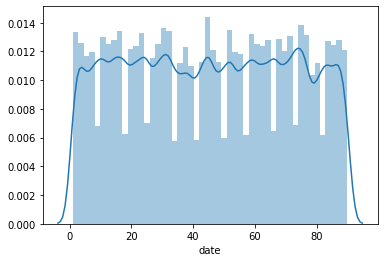

In [8]:
sns.distplot(train5.date)

In [20]:
# less_trans = []

# for i in tqdm(range(0,91)):
#     if len(train5[train5.date==i]) < 16000:
#         less_trans.append(i)
#         print(i, len(train5[train5.date==i]))

In [21]:
# date_less = []

# for i in tqdm(range(0, len(train5))):
#     if train5.date.iloc[i] in less_trans:
#         date_less.append(i)

In [11]:
less = train5.iloc[date_less]

In [12]:
less.fraud.sum()/len(less)

0.015479155143530857

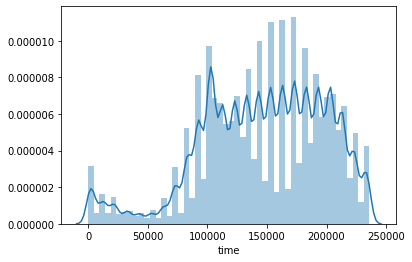

In [13]:
sns.distplot(train5.time)

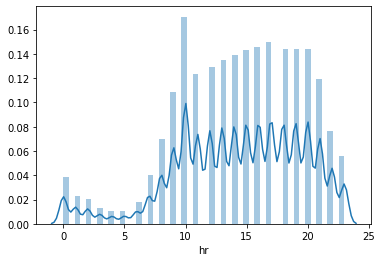

In [14]:
sns.distplot(train5.hr)

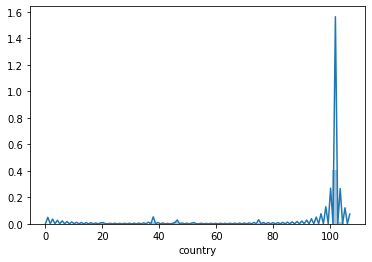

In [15]:
sns.distplot(train5.country)

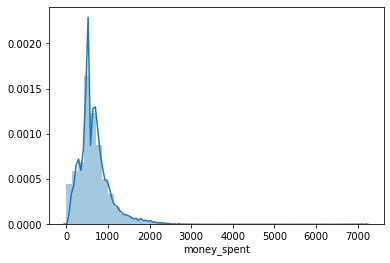

In [16]:
sns.distplot(train5.money_spent)

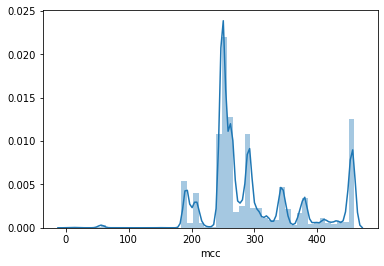

In [17]:
sns.distplot(train5.mcc)

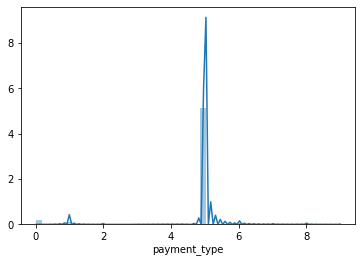

In [18]:
sns.distplot(train5.payment_type)

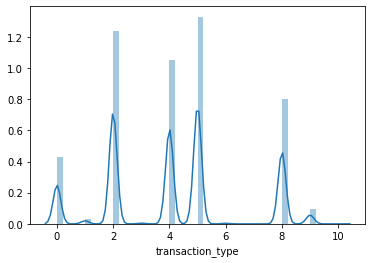

In [19]:
sns.distplot(train5.transaction_type)

# 2. Machine Learning

logistc, random forest, xgboost, lgboosting, deep learning(works better high dimensional data(image, txt), usually perform not as well tabular data is hard)

build model without scaling, then standarize and logorithm only for logistic, linear model(only), featuring model selection 

## 2.1 Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
train = train7.drop(['fraud'], axis=1)
train_fraud = train7.fraud

In [12]:
x_train, x_test, y_train, y_test = train_test_split(train, train_fraud, random_state=0, test_size=0.2)

In [22]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
print(lr.coef_)
print(lr.intercept_)

[[-9.96144703e-07 -7.76194516e-04 -5.32763163e-06  1.14710064e-06
  -3.26621185e-03 -1.05651427e-04  4.81287536e-04 -4.63372711e-04
  -8.45442222e-07 -3.67665909e-05  9.69060694e-04  6.28388340e-05
   1.52597633e-04  1.43771068e-07 -3.90869675e-06  5.59990338e-05
  -2.30276384e-06 -4.43463677e-06 -4.64701898e-03  6.75625678e-07
   1.80452112e-06  6.00393106e-05  8.89492780e-07  1.92723111e-06
   2.19130809e-06  1.24705122e-06]]
[-9.93653011e-06]


In [24]:
y_pred = lr.predict(x_test)

In [28]:
lr_cv_score = cross_val_score(lr, x_train, y_train, cv=10, scoring='roc_auc')
lr_cv_score1 = cross_val_score(lr, x_train, y_train, cv=10, scoring='f1')


/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
print("=== f1 score on test===")
print(f1_score(y_test, y_pred))
print('\n')
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores on CV===")
print(lr_cv_score)
print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", lr_cv_score.mean())
print('\n')
print("=== All f1 Scores on CV===")
print(lr_cv_score1)
print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", lr_cv_score1.mean())

=== f1 score on test===
0.0


=== Confusion Matrix on test===
[[300246      2]
 [  4110      0]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    300248
           1       0.00      0.00      0.00      4110

    accuracy                           0.99    304358
   macro avg       0.49      0.50      0.50    304358
weighted avg       0.97      0.99      0.98    304358



=== All AUC Scores on CV===
[0.8042612  0.85644737 0.84443005 0.84896485 0.85360519 0.84803128
 0.85559897 0.85356807 0.85411269 0.8352787 ]


=== Mean AUC Score on CV===
Mean AUC Score:  0.8454298367859039


=== All f1 Scores on CV===
[0.        0.        0.0012285 0.        0.        0.        0.
 0.0012285 0.        0.       ]


=== Mean f1 Score on CV===
Mean f1 Score:  0.0002457002457002457


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l2'],'C':[0.01,0.1,1,5,10]}

#GridSearchCV算是一個meta-estimator，參數中帶有estimator，像是SVC，重點是會創造一個新的estimator，但又表現的一模一樣。也就是estimator=SVC時，就是作為分類器
#Verbose可設定為任一整數，它只是代表數字越高，文字解釋越多
grid = GridSearchCV(lr,param_grid,verbose=3, scoring='f1')

#利用剛剛設定的參數來找到最適合的模型
grid.fit(x_train,y_train)

#顯示最佳參數組合
grid.best_params_

#顯示最佳estimator參數
grid.best_estimator_

#利用剛剛的最佳參數再重新預測測試組
grid_predictions = grid.predict(x_test)

#評估新參數的預測結果好壞
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

In [116]:
stop here!

SyntaxError: invalid syntax (<ipython-input-116-d7419958e6e3>, line 1)

## 2.2 Random Forest Regressor

In [34]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier


### Result of hidden variable added and apply on the competition set -- competition score -- 0.430294

Drop the mcc_no, the score is higher:
* 2.2.1 Add hidden keep index and rate_of_fraud_for_each_mchno F1: 0.74887
* 2.2.2 Add hidden keep index and drop mcc fraud rate F1: 0.75062344
* 2.2.2 Add hidden F1: 0.7338790, competition: 0.430294
* 2.2.3 Hidden + Dummies F1: 0.70924
* 2.2.4 Origin F1: 0.71489

### 2.2.1 Add hidden keep index and rate_of_fraud_for_each_mchno F1: 0.74887 -- BEST

In [69]:
train_with_index = train5.drop(['fraud','time1'], axis=1)
train_fraud_with_index = train5.fraud

In [70]:
train_with_index.head()

,card_no,date,time,hr,country,city,money_spent,receiver_code,bank_no,transaction_category,currency,online_transaction,transaction_type,fallback_mark,3ds_mark,payment_type,term_mark,terms,mcc,merchandise_code,over_limit,situation_code,transaction_no,num_index,in_five_mins,diff_country_cont2,five_mins_diff_country_cont2,rate_of_fraud_for_each_mchno
0,0,1.0,151948,15,102,5817,236.43,6032,116316,5,62,0,4,0.0,0.0,5,0,0,251,77974,0,0,274548,284164,0.0,0.0,0.0,0.000526
1,0,4.0,154407,15,102,5817,319.72,6032,116316,5,62,0,4,0.0,0.0,5,0,0,251,77974,0,0,391141,1185304,0.0,0.0,0.0,0.000526
2,0,29.0,152243,15,102,5817,272.12,6032,116316,5,62,0,4,0.0,0.0,5,0,0,251,77974,0,0,426341,155960,0.0,0.0,0.0,0.000526
3,0,37.0,143710,14,102,5817,283.91,6032,116316,5,62,0,4,0.0,0.0,5,0,0,251,77974,0,0,399230,418445,0.0,0.0,0.0,0.000526
4,0,43.0,140023,14,102,5817,250.19,6032,116316,5,62,0,4,0.0,0.0,5,0,0,251,77974,0,0,112708,1223772,0.0,0.0,0.0,0.000526


In [71]:
x_train, x_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, random_state=0, test_size=0.2)


In [72]:
rfc = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=4, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=100)

rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
rfc_predict = rfc.predict(x_test)



tunning no good here!

In [75]:
print("=== f1 score on test===")
print(f1_score(y_test, rfc_predict))

=== f1 score on test===
0.3729198184568835


ORIGIN!

In [38]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
rfc_predict = rfc.predict(x_test)


In [40]:
importances = rfc.feature_importances_

<Figure size 1080x576 with 0 Axes>

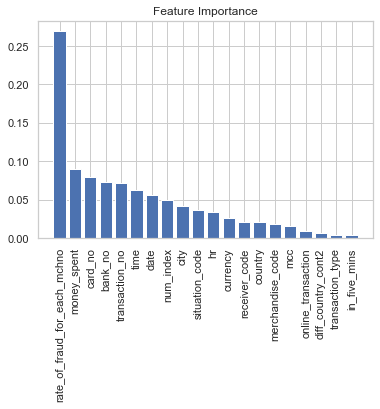

In [41]:

fig = plt.gcf()
fig.set_size_inches(15,8)

# Sort feature importances in descending order
indices = (np.argsort(importances)[::-1])[:20]

# Rearrange feature names so they match the sorted feature importances
names = [train_with_index.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(0, 20), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(0, 20), names[:20], rotation=90)

# Show plot
plt.show();

In [42]:
rfc_cv_score = cross_val_score(rfc, x_train, y_train, cv=10, scoring='roc_auc')
rfc_cv_score1 = cross_val_score(rfc, x_train, y_train, cv=10, scoring='f1')


In [43]:
print("=== f1 score on test===")
print(f1_score(y_test, rfc_predict))
print('\n')
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores on CV===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", rfc_cv_score.mean())
print('\n')
print("=== All f1 Scores on CV===")
print(rfc_cv_score1)
print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", rfc_cv_score1.mean())

=== f1 score on test===
0.7464074387151312


=== Confusion Matrix on test===
[[299909    339]
 [  1461   2649]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    300248
           1       0.89      0.64      0.75      4110

    accuracy                           0.99    304358
   macro avg       0.94      0.82      0.87    304358
weighted avg       0.99      0.99      0.99    304358



=== All AUC Scores on CV===
[0.95841131 0.95122025 0.95881227 0.95407071 0.95751459 0.95640292
 0.95628831 0.96473606 0.96123271 0.95696629]


=== Mean AUC Score on CV===
Mean AUC Score:  0.9575655412963376


=== All f1 Scores on CV===
[0.73314204 0.72851986 0.73807829 0.72020166 0.73047859 0.71780029
 0.73710602 0.74254937 0.71694067 0.7309065 ]


=== Mean f1 Score on CV===
Mean f1 Score:  0.7295723276128097


In [41]:
f1_score(y_test, rfc_predict)

0.7514693534844669

Scaling performed better!!

In [55]:
x_train, x_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, random_state=0, test_size=0.2)

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [56]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
rfc_predict = rfc.predict(x_test)



In [58]:
importances = rfc.feature_importances_

<Figure size 1080x576 with 0 Axes>

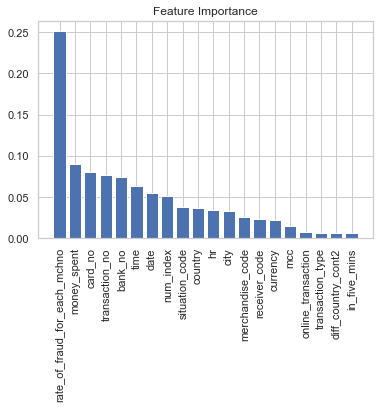

In [59]:

fig = plt.gcf()
fig.set_size_inches(15,8)

# Sort feature importances in descending order
indices = (np.argsort(importances)[::-1])[:20]

# Rearrange feature names so they match the sorted feature importances
names = [train_with_index.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(0, 20), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(0, 20), names[:20], rotation=90)

# Show plot
plt.show();

In [60]:
rfc_cv_score = cross_val_score(rfc, x_train, y_train, cv=10, scoring='roc_auc')
rfc_cv_score1 = cross_val_score(rfc, x_train, y_train, cv=10, scoring='f1')



In [61]:
print("=== f1 score on test===")
print(f1_score(y_test, rfc_predict))
print('\n')
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores on CV===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", rfc_cv_score.mean())
print('\n')
print("=== All f1 Scores on CV===")
print(rfc_cv_score1)
print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", rfc_cv_score1.mean())

=== f1 score on test===
0.7454134913914762


=== Confusion Matrix on test===
[[299913    335]
 [  1469   2641]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    300248
           1       0.89      0.64      0.75      4110

    accuracy                           0.99    304358
   macro avg       0.94      0.82      0.87    304358
weighted avg       0.99      0.99      0.99    304358



=== All AUC Scores on CV===
[0.96003629 0.95703652 0.96205094 0.95947584 0.95700634 0.95356989
 0.95494967 0.96063459 0.96236842 0.95579921]


=== Mean AUC Score on CV===
Mean AUC Score:  0.9582927694394391


=== All f1 Scores on CV===
[0.7338594  0.73116744 0.73579545 0.72393961 0.73132184 0.7227616
 0.73774597 0.73513514 0.71997132 0.73347548]


=== Mean f1 Score on CV===
Mean f1 Score:  0.7305173245299807


In [63]:
param_grid = {'bootstrap': [True],'max_depth': [3,4,5,None],'max_features': ['auto'],\
               'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10],\
              'n_estimators': [100, 500, 1000], 'criterion': ['gini']}


grid = GridSearchCV(rfc,param_grid,verbose=3, scoring='f1')

grid.fit(x_train,y_train)

grid.best_params_

grid.best_estimator_

grid_predictions = grid.predict(x_test)

print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.144, total= 1.1min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.200, total= 1.0min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min remaining:    0.0s


[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.001, total= 1.1min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.029, total= 5.0min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.028, total= 4.8min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.113, total=

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.000, total= 4.8min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.002, total=36.3min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.007, total= 9.6min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.007, to

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, score=0.000, total= 5.0min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.012, total=11.5min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.014, total= 9.9min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.073, 

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.000, total= 1.0min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.081, total=  56.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.020, total=  57.0s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, score=0.039,

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.000, total= 9.9min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.011, total= 9.9min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.069, total=  59.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.005, tot

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500, score=0.000, total= 5.0min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500 


/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500, score=0.000, total= 4.9min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.008, total= 9.4min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.040, total=20.8min
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.019, 

KeyboardInterrupt: 

### 2.2.2 Add hidden keep index and drop mcc fraud rate F1: 0.7506234432418132

In [47]:
train_with_index = train5.drop(['fraud','time1','rate_of_fraud_for_each_mchno'], axis=1)
train_fraud_with_index = train5.fraud

In [48]:
x_train, x_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, random_state=0, test_size=0.2)


In [49]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
rfc_predict = rfc.predict(x_test)



In [52]:
rfc_cv_score = cross_val_score(rfc, train_with_index, train_fraud_with_index, cv=10, scoring='roc_auc')



<Figure size 1080x576 with 0 Axes>

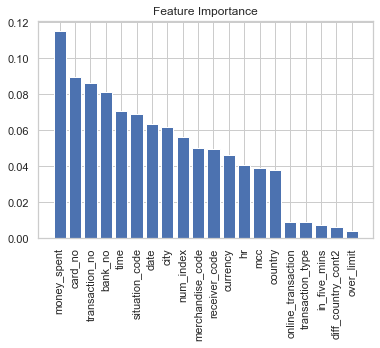

In [53]:
importances = rfc.feature_importances_

fig = plt.gcf()
fig.set_size_inches(15,8)

# Sort feature importances in descending order
indices = (np.argsort(importances)[::-1])[:20]

# Rearrange feature names so they match the sorted feature importances
names = [train_with_index.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(0, 20), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(0, 20), names[:20], rotation=90)

# Show plot
plt.show();

In [54]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[299972    276]
 [  1743   2367]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    300248
           1       0.90      0.58      0.70      4110

    accuracy                           0.99    304358
   macro avg       0.94      0.79      0.85    304358
weighted avg       0.99      0.99      0.99    304358



=== All AUC Scores ===
[0.84318114 0.4983353  0.42582205 0.64474546 0.9328576  0.86173918
 0.76933753 0.86520391 0.88858293 0.83931863]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7569123725682081


In [55]:
f1_score(y_test, rfc_predict)

0.7010217681030652

In [179]:
test5 = pd.read_csv('data/test4.csv', index_col=False)

In [180]:
test_with_index = test5.drop(['time1','rate_of_fraud_for_each_mchno'], axis=1)

In [181]:
rfc_predict = rfc.predict(test_with_index)

In [182]:
test_with_index['fraud_ind'] = rfc_predict
test_with_index.fraud_ind.value_counts()

0    418358
1      3307
Name: fraud_ind, dtype: int64

In [188]:
test_with_index['fraud_ind'] = rfc_predict
test_with_index.fraud_ind.value_counts()
test_with_index['txkey']=test_with_index.transaction_no
rfc_best = test_with_index[['txkey','fraud_ind']]

In [189]:
rfc_best.to_csv('data/rfc_best.csv', index=False)

### 2.2.3 Add hidden F1: 0.7338790, competition: 0.430294

In [56]:
train = train7.drop(['fraud'], axis=1)
train_fraud = train7.fraud

In [57]:
x_train, x_test, y_train, y_test = train_test_split(train, train_fraud, random_state=0, test_size=0.2)



In [58]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
rfc_predict = rfc.predict(x_test)


In [60]:
rfc_cv_score = cross_val_score(rfc, train, train_fraud, cv=10, scoring='roc_auc')


<Figure size 1080x576 with 0 Axes>

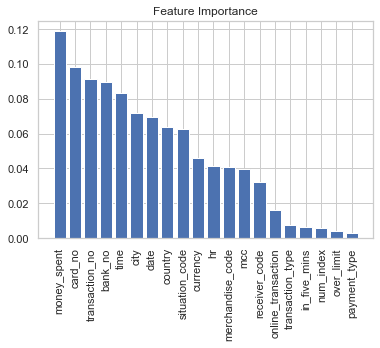

In [61]:
importances = rfc.feature_importances_

fig = plt.gcf()
fig.set_size_inches(15,8)

# Sort feature importances in descending order
indices = (np.argsort(importances)[::-1])[:20]

# Rearrange feature names so they match the sorted feature importances
names = [train_with_index.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(0, 20), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(0, 20), names[:20], rotation=90)

# Show plot
plt.show();

In [62]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[299940    308]
 [  1574   2536]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    300248
           1       0.89      0.62      0.73      4110

    accuracy                           0.99    304358
   macro avg       0.94      0.81      0.86    304358
weighted avg       0.99      0.99      0.99    304358



=== All AUC Scores ===
[0.85273851 0.48794848 0.35174188 0.63451976 0.94502293 0.79188607
 0.7729272  0.86147813 0.89928146 0.84640214]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7443946560417822


In [63]:
f1_score(y_test, rfc_predict)

0.7293643945930398

In [224]:
here apply to real data!

SyntaxError: invalid syntax (<ipython-input-224-50a308b0c4f6>, line 1)

In [54]:
test = test7.drop('rate_of_fraud_for_each_mchno', axis=1)

In [55]:
rfc_predict = rfc.predict(test)

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421665 entries, 0 to 421664
Data columns (total 26 columns):
card_no                         421665 non-null int64
date                            421665 non-null float64
time                            421665 non-null int64
hr                              421665 non-null int64
country                         421665 non-null int64
city                            421665 non-null int64
money_spent                     421665 non-null float64
receiver_code                   421665 non-null int64
bank_no                         421665 non-null int64
transaction_category            421665 non-null int64
currency                        421665 non-null int64
online_transaction              421665 non-null int64
transaction_type                421665 non-null int64
fallback_mark                   421665 non-null float64
3ds_mark                        421665 non-null float64
payment_type                    421665 non-null int64
term_mark        

In [57]:
test['fraud_ind'] = rfc_predict
test.fraud_ind.value_counts()


0    418730
1      2935
Name: fraud_ind, dtype: int64

In [58]:
test['txkey']=test.transaction_no
upload_1 = test[['txkey','fraud_ind']]

In [59]:
test.fraud_ind.sum()

2935

In [60]:
test.fraud_ind.sum()/len(test)

0.006960501820165297

In [61]:
test['fraud_ind'] = rfc_predict
test.fraud_ind.value_counts()
test['txkey']=test.transaction_no
test[['txkey','fraud_ind']]
upload_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421665 entries, 0 to 421664
Data columns (total 2 columns):
txkey        421665 non-null int64
fraud_ind    421665 non-null int64
dtypes: int64(2)
memory usage: 6.4 MB


In [62]:
upload_1.to_csv('data/upload1.csv', index=False)

In [182]:
stop here!

SyntaxError: invalid syntax (<ipython-input-182-d7419958e6e3>, line 1)

### 2.2.4 Hidden + Dummies F1: 0.70924

In [70]:
train.columns

Index(['card_no', 'date', 'time', 'hr', 'country', 'city', 'money_spent',
       'receiver_code', 'bank_no', 'transaction_category', 'currency',
       'online_transaction', 'transaction_type', 'fallback_mark', '3ds_mark',
       'payment_type', 'term_mark', 'terms', 'mcc', 'merchandise_code',
       'over_limit', 'situation_code', 'transaction_no', 'in_five_mins',
       'diff_country_cont2', 'five_mins_diff_country_cont2'],
      dtype='object')

In [93]:
oh_train = pd.get_dummies(train7, columns = ['hr','transaction_type'])

In [94]:
oh_test = pd.get_dummies(test7, columns = ['hr','transaction_type'])

In [95]:
ohe_train = oh_train.drop(['fraud','rate_of_fraud_for_each_mchno'], axis=1)
ohe_test = oh_test.drop('rate_of_fraud_for_each_mchno', axis=1)

In [99]:
x_train, x_test, y_train, y_test = train_test_split(ohe_train, train7.fraud, random_state=0, test_size=0.2)


In [100]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
rfc_predict = rfc.predict(x_test)



In [102]:
rfc_cv_score = cross_val_score(rfc, train, train7.fraud, cv=10, scoring='roc_auc')



In [103]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[299952    296]
 [  1689   2421]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    300248
           1       0.89      0.59      0.71      4110

    accuracy                           0.99    304358
   macro avg       0.94      0.79      0.85    304358
weighted avg       0.99      0.99      0.99    304358



=== All AUC Scores ===
[0.85097305 0.50281405 0.35314121 0.63576003 0.944166   0.83242934
 0.75543951 0.86823798 0.87662369 0.84612392]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7465708768025008


In [104]:
f1_score(y_test, rfc_predict)

0.7092427127581662

### 2.2.5 Origin F1: 0.71489

In [64]:
origin = pd.read_csv('data/origin_train.csv', index_col=False)

In [65]:
origin_test1 = pd.read_csv('data/origin_test.csv', index_col=False)

In [66]:
origin_train = origin.drop(['time1','num_index','fraud'],axis=1)
origin_train_fraud = origin.fraud
origin_test = origin_test1.drop(['time1','num_index'], axis=1)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(origin_train, origin_train_fraud, random_state=0, test_size=0.2)

In [68]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
rfc_predict = rfc.predict(x_test)



In [70]:
rfc_cv_score = cross_val_score(rfc, origin_train, origin.fraud, cv=10, scoring='roc_auc')



<Figure size 1080x576 with 0 Axes>

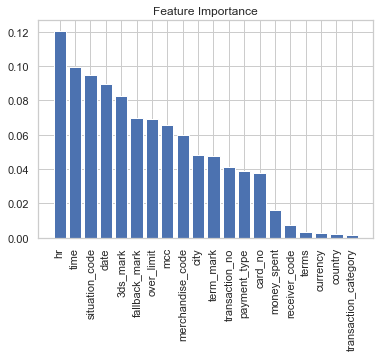

In [71]:
importances = rfc.feature_importances_

fig = plt.gcf()
fig.set_size_inches(15,8)

# Sort feature importances in descending order
indices = (np.argsort(importances)[::-1])[:20]

# Rearrange feature names so they match the sorted feature importances
names = [train_with_index.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(0, 20), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(0, 20), names[:20], rotation=90)

# Show plot
plt.show();

In [72]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[300008    287]
 [  1645   2418]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    300295
           1       0.89      0.60      0.71      4063

    accuracy                           0.99    304358
   macro avg       0.94      0.80      0.86    304358
weighted avg       0.99      0.99      0.99    304358



=== All AUC Scores ===
[0.95552276 0.9611723  0.95312206 0.94898084 0.95726002 0.95212336
 0.95343224 0.9485531  0.9530094  0.95268017]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.953585624926163


In [73]:
f1_score(y_test, rfc_predict)

0.7145390070921986

In [ ]:
Stop here!

## 2.3 PCA
Since the first two explained_variance only add up to 20%, it is not a suitable method here.

In [212]:
train5 = pd.read_csv('data/train4.csv', index_col=False)

In [213]:
train_with_index = train5.drop(['fraud','time1','rate_of_fraud_for_each_mchno'], axis=1)
train_fraud_with_index = train5.fraud

In [214]:
from sklearn.preprocessing import StandardScaler


In [216]:
features = ['card_no', 'date', 'time', 'hr', 'country', 'city', 'money_spent',\
           'receiver_code', 'bank_no', 'transaction_category', 'currency',\
           'online_transaction', 'transaction_type', 'fallback_mark', '3ds_mark',\
           'payment_type', 'term_mark', 'terms', 'mcc', 'merchandise_code',\
           'over_limit', 'situation_code', 'transaction_no', 'num_index',\
           'in_five_mins', 'diff_country_cont2', 'five_mins_diff_country_cont2']
x = train5.loc[:, features].values
# Separating out the target
y = train5.loc[:,['fraud']].values
# Standardizing the features

In [217]:
standard_train_with_index = StandardScaler().fit_transform(x)

In [218]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [219]:
principalComponents = pca.fit_transform(standard_train_with_index)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal_component_1', 'principal_component_2'])

In [220]:
finalDf = pd.concat([principalDf, train5['fraud']], axis = 1)

In [269]:
finalDf.head()

,principal_component_1,principal_component_2,fraud
0,-0.351330,-0.583834,0
1,-0.455319,-0.596718,0
2,-0.414597,-0.597953,0
3,-0.354390,-0.476122,0
4,-0.259158,-0.453960,0


In [232]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = [1,0]
# colors = ['r','b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['fraud'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
#                , finalDf.loc[indicesToKeep, 'principal_component_1']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

In [225]:
pca.explained_variance_ratio_


array([0.11863249, 0.08392743])

Another method to check!

In [226]:
X_train, X_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, test_size=0.2, random_state=0)


In [227]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [228]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [230]:
explained_variance = pca.explained_variance_ratio_

array([1.18643283e-01, 8.39836283e-02, 7.12706123e-02, 6.67112096e-02,
       5.62566450e-02, 5.02000365e-02, 4.46483309e-02, 4.14049921e-02,
       3.99373116e-02, 3.95003720e-02, 3.82318768e-02, 3.70370601e-02,
       3.67835393e-02, 3.52590896e-02, 3.42714692e-02, 3.35697859e-02,
       3.00414478e-02, 2.89997841e-02, 2.22842108e-02, 1.99428334e-02,
       1.78030760e-02, 1.46194297e-02, 1.34173130e-02, 1.13851000e-02,
       7.20966815e-03, 6.56715256e-03, 2.07424177e-05])

experiment:

In [251]:
train5 = pd.read_csv('data/train4.csv', index_col=False)

In [258]:
train_with_index = train5.drop(['fraud','time1','rate_of_fraud_for_each_mchno','time', 'receiver_code', 'bank_no','transaction_category', 'currency','payment_type', 'term_mark','transaction_no', 'num_index', 'terms', 'mcc', 'merchandise_code','payment_type','3ds_mark','num_index','in_five_mins', 'diff_country_cont2', 'five_mins_diff_country_cont2'], axis=1)
train_fraud_with_index = train5.fraud

In [259]:
X_train, X_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, test_size=0.2, random_state=0)


In [260]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [261]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [262]:
explained_variance = pca.explained_variance_ratio_

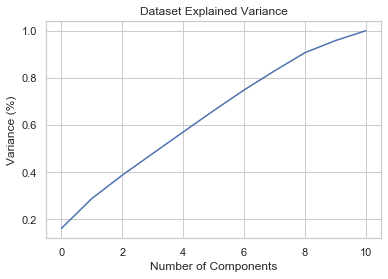

In [266]:
plt.figure()
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [ ]:
Stop here!

In [ ]:
train = train7.drop(['fraud'], axis=1)
train_fraud = train7.fraud

# 2.4 KNN:
Takes too long cannot run

In [273]:
train5 = pd.read_csv('data/train4.csv', index_col=False)

In [274]:
train_with_index = train5.drop(['fraud','time1','rate_of_fraud_for_each_mchno'], axis=1)
train_fraud_with_index = train5.fraud

In [276]:
X_train, X_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, test_size=0.20)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [277]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)



In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
print(f1_score(y_test, y_pred))

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
train5 = pd.read_csv('data/train4.csv', index_col=False)

In [ ]:
train_with_index = train5.drop(['fraud','time1','rate_of_fraud_for_each_mchno'], axis=1)
train_fraud_with_index = train5.fraud

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_with_index, train_fraud_with_index, test_size=0.20)




In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
print(f1_score(y_test, y_pred))

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
train = train7.drop(['fraud'], axis=1)
train_fraud = train7.fraud

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, train_fraud, test_size=0.20)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## 2.5 SVM
Cannot work -- too slow!!

In [76]:
from sklearn.svm import SVC
model = SVC()

In [77]:
train = train7.drop(['fraud'], axis=1)
train_fraud = train7.fraud

In [78]:
X_train, X_test, y_train, y_test = train_test_split(train, train_fraud, test_size=0.20)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
svm = SVC()
tqdm(svm.fit(X_train, y_train))

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
svm_cv_score = cross_val_score(svm, X_train, y_train, cv=10, scoring='roc_auc')
svm_cv_score1 = cross_val_score(svm, X_train, y_train, train_fraud_with_index, cv=10, scoring='f1')


In [ ]:
print("=== f1 score on test===")
print(f1_score(y_test, y_pred))
print('\n')
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores on CV===")
print(svm_cv_score)
print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", svm_cv_score.mean())
print('\n')
print("=== All f1 Scores on CV===")
print(svm_cv_score1)
print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", svm_cv_score1.mean())

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[1,10,100],'gamma':[0.1,0.01,0.001]}

#GridSearchCV算是一個meta-estimator，參數中帶有estimator，像是SVC，重點是會創造一個新的estimator，但又表現的一模一樣。也就是estimator=SVC時，就是作為分類器
#Verbose可設定為任一整數，它只是代表數字越高，文字解釋越多
grid = GridSearchCV(lr,param_grid,verbose=3, scoring='f1')

#利用剛剛設定的參數來找到最適合的模型
grid.fit(x_train,y_train)

#顯示最佳參數組合
grid.best_params_

#顯示最佳estimator參數
grid.best_estimator_

#利用剛剛的最佳參數再重新預測測試組
grid_predictions = grid.predict(X_test)

#評估新參數的預測結果好壞
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

In [183]:
import lightgbm as lgb  
import pandas as pd  
import numpy as np  
import pickle  
from sklearn.metrics import roc_auc_score  
from sklearn.model_selection import train_test_split 

In [197]:
import lightgbm as lgb  
import pandas as pd  
import numpy as np  
import pickle  
from sklearn.metrics import roc_auc_score  
from sklearn.model_selection import train_test_split  
  
  
# 导入数据  
  
# 用sklearn.cross_validation进行训练数据集划分，这里训练集和交叉验证集比例为7：3，可以自己根据需要设置  
X, val_X, y, val_y = train_test_split(  
    origin_train,  
    origin.fraud,  
    test_size=0.05,  
    random_state=1 ## 这里保证分割后y的比例分布与原数据一致  
)  
  
X_train = X  
y_train = y  
X_test = val_X  
y_test = val_y  
  
  
# create dataset for lightgbm  
lgb_train = lgb.Dataset(X_train, y_train)  
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)  
# specify your configurations as a dict  
params = {  
    'boosting_type': 'gbdt',  
    'objective': 'binary',  
    'metric': {'binary_logloss', 'auc'},  
    'num_leaves': 5,  
    'max_depth': 6,  
    'min_data_in_leaf': 450,  
    'learning_rate': 0.1,  
    'feature_fraction': 0.9,  
    'bagging_fraction': 0.95,  
    'bagging_freq': 5,  
    'lambda_l1': 1,    
    'lambda_l2': 0.001,  # 越小l2正则程度越高  
    'min_gain_to_split': 0.2,  
    'verbose': 5,  
    'is_unbalance': True  
}  
  
# train  
print('Start training...')  
gbm = lgb.train(params,  
                lgb_train,  
                num_boost_round=10000,  
                valid_sets=lgb_eval,  
                early_stopping_rounds=500)  
  
print('Start predicting...')  
  
preds = gbm.predict(x_test, num_iteration=gbm.best_iteration)  # 输出的是概率结果  
  
# 导出结果  
threshold = 0.5  
for pred in preds:  
    result = 1 if pred > threshold else 0  
  
# 导出特征重要性  
importance = gbm.feature_importance()  
names = gbm.feature_name()  
with open('./feature_importance.txt', 'w+') as file:  
    for index, im in enumerate(importance):  
        string = names[index] + ', ' + str(im) + '\n'  
        file.write(string)  


Start training...
[1]	valid_0's binary_logloss: 0.420648	valid_0's auc: 0.884664
Training until validation scores don't improve for 500 rounds
[2]	valid_0's binary_logloss: 0.386462	valid_0's auc: 0.9212
[3]	valid_0's binary_logloss: 0.375519	valid_0's auc: 0.929982
[4]	valid_0's binary_logloss: 0.36374	valid_0's auc: 0.943569
[5]	valid_0's binary_logloss: 0.350884	valid_0's auc: 0.943813
[6]	valid_0's binary_logloss: 0.34199	valid_0's auc: 0.944091
[7]	valid_0's binary_logloss: 0.335364	valid_0's auc: 0.947333
[8]	valid_0's binary_logloss: 0.328128	valid_0's auc: 0.947234
[9]	valid_0's binary_logloss: 0.322666	valid_0's auc: 0.947894
[10]	valid_0's binary_logloss: 0.316972	valid_0's auc: 0.947709
[11]	valid_0's binary_logloss: 0.312009	valid_0's auc: 0.9474
[12]	valid_0's binary_logloss: 0.307909	valid_0's auc: 0.94795
[13]	valid_0's binary_logloss: 0.303983	valid_0's auc: 0.949062
[14]	valid_0's binary_logloss: 0.300729	valid_0's auc: 0.949163
[15]	valid_0's binary_logloss: 0.297125	

[134]	valid_0's binary_logloss: 0.229292	valid_0's auc: 0.965696
[135]	valid_0's binary_logloss: 0.229183	valid_0's auc: 0.965765
[136]	valid_0's binary_logloss: 0.229091	valid_0's auc: 0.965785
[137]	valid_0's binary_logloss: 0.228818	valid_0's auc: 0.965896
[138]	valid_0's binary_logloss: 0.228437	valid_0's auc: 0.965971
[139]	valid_0's binary_logloss: 0.228228	valid_0's auc: 0.966022
[140]	valid_0's binary_logloss: 0.227977	valid_0's auc: 0.966072
[141]	valid_0's binary_logloss: 0.22768	valid_0's auc: 0.966184
[142]	valid_0's binary_logloss: 0.226767	valid_0's auc: 0.966404
[143]	valid_0's binary_logloss: 0.22659	valid_0's auc: 0.966455
[144]	valid_0's binary_logloss: 0.226516	valid_0's auc: 0.966521
[145]	valid_0's binary_logloss: 0.226308	valid_0's auc: 0.966619
[146]	valid_0's binary_logloss: 0.226035	valid_0's auc: 0.966691
[147]	valid_0's binary_logloss: 0.225798	valid_0's auc: 0.966717
[148]	valid_0's binary_logloss: 0.225572	valid_0's auc: 0.966736
[149]	valid_0's binary_logl

[266]	valid_0's binary_logloss: 0.211305	valid_0's auc: 0.970719
[267]	valid_0's binary_logloss: 0.211217	valid_0's auc: 0.970741
[268]	valid_0's binary_logloss: 0.21107	valid_0's auc: 0.970802
[269]	valid_0's binary_logloss: 0.210922	valid_0's auc: 0.970804
[270]	valid_0's binary_logloss: 0.210746	valid_0's auc: 0.970802
[271]	valid_0's binary_logloss: 0.210659	valid_0's auc: 0.97128
[272]	valid_0's binary_logloss: 0.210586	valid_0's auc: 0.971269
[273]	valid_0's binary_logloss: 0.210483	valid_0's auc: 0.971275
[274]	valid_0's binary_logloss: 0.210422	valid_0's auc: 0.971277
[275]	valid_0's binary_logloss: 0.210368	valid_0's auc: 0.971301
[276]	valid_0's binary_logloss: 0.210239	valid_0's auc: 0.971321
[277]	valid_0's binary_logloss: 0.210236	valid_0's auc: 0.971306
[278]	valid_0's binary_logloss: 0.210144	valid_0's auc: 0.971328
[279]	valid_0's binary_logloss: 0.210021	valid_0's auc: 0.971375
[280]	valid_0's binary_logloss: 0.209944	valid_0's auc: 0.971398
[281]	valid_0's binary_logl

[397]	valid_0's binary_logloss: 0.201155	valid_0's auc: 0.973211
[398]	valid_0's binary_logloss: 0.201189	valid_0's auc: 0.973218
[399]	valid_0's binary_logloss: 0.201188	valid_0's auc: 0.973232
[400]	valid_0's binary_logloss: 0.201201	valid_0's auc: 0.973242
[401]	valid_0's binary_logloss: 0.201187	valid_0's auc: 0.973255
[402]	valid_0's binary_logloss: 0.201122	valid_0's auc: 0.97327
[403]	valid_0's binary_logloss: 0.201039	valid_0's auc: 0.973271
[404]	valid_0's binary_logloss: 0.20096	valid_0's auc: 0.973285
[405]	valid_0's binary_logloss: 0.200887	valid_0's auc: 0.9733
[406]	valid_0's binary_logloss: 0.200861	valid_0's auc: 0.973295
[407]	valid_0's binary_logloss: 0.200866	valid_0's auc: 0.973293
[408]	valid_0's binary_logloss: 0.200846	valid_0's auc: 0.973298
[409]	valid_0's binary_logloss: 0.200817	valid_0's auc: 0.973311
[410]	valid_0's binary_logloss: 0.200811	valid_0's auc: 0.973314
[411]	valid_0's binary_logloss: 0.200719	valid_0's auc: 0.973321
[412]	valid_0's binary_loglos

[528]	valid_0's binary_logloss: 0.194355	valid_0's auc: 0.974483
[529]	valid_0's binary_logloss: 0.194344	valid_0's auc: 0.974467
[530]	valid_0's binary_logloss: 0.194273	valid_0's auc: 0.974473
[531]	valid_0's binary_logloss: 0.194244	valid_0's auc: 0.974474
[532]	valid_0's binary_logloss: 0.194201	valid_0's auc: 0.9745
[533]	valid_0's binary_logloss: 0.194156	valid_0's auc: 0.974502
[534]	valid_0's binary_logloss: 0.194134	valid_0's auc: 0.974516
[535]	valid_0's binary_logloss: 0.194086	valid_0's auc: 0.974537
[536]	valid_0's binary_logloss: 0.193968	valid_0's auc: 0.974557
[537]	valid_0's binary_logloss: 0.193916	valid_0's auc: 0.97456
[538]	valid_0's binary_logloss: 0.193833	valid_0's auc: 0.974569
[539]	valid_0's binary_logloss: 0.193732	valid_0's auc: 0.974578
[540]	valid_0's binary_logloss: 0.193651	valid_0's auc: 0.974579
[541]	valid_0's binary_logloss: 0.193546	valid_0's auc: 0.974597
[542]	valid_0's binary_logloss: 0.193502	valid_0's auc: 0.974634
[543]	valid_0's binary_loglo

[655]	valid_0's binary_logloss: 0.18804	valid_0's auc: 0.975833
[656]	valid_0's binary_logloss: 0.188007	valid_0's auc: 0.975841
[657]	valid_0's binary_logloss: 0.187998	valid_0's auc: 0.975843
[658]	valid_0's binary_logloss: 0.187967	valid_0's auc: 0.975837
[659]	valid_0's binary_logloss: 0.18795	valid_0's auc: 0.975833
[660]	valid_0's binary_logloss: 0.18793	valid_0's auc: 0.975851
[661]	valid_0's binary_logloss: 0.187863	valid_0's auc: 0.975859
[662]	valid_0's binary_logloss: 0.187802	valid_0's auc: 0.975874
[663]	valid_0's binary_logloss: 0.18773	valid_0's auc: 0.975883
[664]	valid_0's binary_logloss: 0.187722	valid_0's auc: 0.975885
[665]	valid_0's binary_logloss: 0.18766	valid_0's auc: 0.975907
[666]	valid_0's binary_logloss: 0.187614	valid_0's auc: 0.975907
[667]	valid_0's binary_logloss: 0.187571	valid_0's auc: 0.97591
[668]	valid_0's binary_logloss: 0.187474	valid_0's auc: 0.975941
[669]	valid_0's binary_logloss: 0.18746	valid_0's auc: 0.975911
[670]	valid_0's binary_logloss: 

[788]	valid_0's binary_logloss: 0.182511	valid_0's auc: 0.977205
[789]	valid_0's binary_logloss: 0.182491	valid_0's auc: 0.977207
[790]	valid_0's binary_logloss: 0.182475	valid_0's auc: 0.977209
[791]	valid_0's binary_logloss: 0.182438	valid_0's auc: 0.97722
[792]	valid_0's binary_logloss: 0.182409	valid_0's auc: 0.977225
[793]	valid_0's binary_logloss: 0.182398	valid_0's auc: 0.977231
[794]	valid_0's binary_logloss: 0.182395	valid_0's auc: 0.977229
[795]	valid_0's binary_logloss: 0.182365	valid_0's auc: 0.977215
[796]	valid_0's binary_logloss: 0.182361	valid_0's auc: 0.977204
[797]	valid_0's binary_logloss: 0.182344	valid_0's auc: 0.977206
[798]	valid_0's binary_logloss: 0.18235	valid_0's auc: 0.977232
[799]	valid_0's binary_logloss: 0.18234	valid_0's auc: 0.977238
[800]	valid_0's binary_logloss: 0.182289	valid_0's auc: 0.97724
[801]	valid_0's binary_logloss: 0.18221	valid_0's auc: 0.977251
[802]	valid_0's binary_logloss: 0.182185	valid_0's auc: 0.977255
[803]	valid_0's binary_logloss

[917]	valid_0's binary_logloss: 0.177716	valid_0's auc: 0.97796
[918]	valid_0's binary_logloss: 0.177713	valid_0's auc: 0.97795
[919]	valid_0's binary_logloss: 0.177673	valid_0's auc: 0.977955
[920]	valid_0's binary_logloss: 0.17765	valid_0's auc: 0.97796
[921]	valid_0's binary_logloss: 0.177637	valid_0's auc: 0.977968
[922]	valid_0's binary_logloss: 0.177653	valid_0's auc: 0.977959
[923]	valid_0's binary_logloss: 0.177661	valid_0's auc: 0.977967
[924]	valid_0's binary_logloss: 0.177657	valid_0's auc: 0.977979
[925]	valid_0's binary_logloss: 0.177651	valid_0's auc: 0.977988
[926]	valid_0's binary_logloss: 0.177623	valid_0's auc: 0.977992
[927]	valid_0's binary_logloss: 0.177619	valid_0's auc: 0.977994
[928]	valid_0's binary_logloss: 0.177573	valid_0's auc: 0.978005
[929]	valid_0's binary_logloss: 0.17756	valid_0's auc: 0.978007
[930]	valid_0's binary_logloss: 0.177541	valid_0's auc: 0.97801
[931]	valid_0's binary_logloss: 0.177542	valid_0's auc: 0.978021
[932]	valid_0's binary_logloss:

[1045]	valid_0's binary_logloss: 0.174083	valid_0's auc: 0.978661
[1046]	valid_0's binary_logloss: 0.173978	valid_0's auc: 0.978674
[1047]	valid_0's binary_logloss: 0.173907	valid_0's auc: 0.978674
[1048]	valid_0's binary_logloss: 0.173838	valid_0's auc: 0.978663
[1049]	valid_0's binary_logloss: 0.173755	valid_0's auc: 0.978662
[1050]	valid_0's binary_logloss: 0.173683	valid_0's auc: 0.978663
[1051]	valid_0's binary_logloss: 0.173663	valid_0's auc: 0.978659
[1052]	valid_0's binary_logloss: 0.173647	valid_0's auc: 0.978663
[1053]	valid_0's binary_logloss: 0.173575	valid_0's auc: 0.978673
[1054]	valid_0's binary_logloss: 0.173561	valid_0's auc: 0.97867
[1055]	valid_0's binary_logloss: 0.173552	valid_0's auc: 0.978673
[1056]	valid_0's binary_logloss: 0.173532	valid_0's auc: 0.978655
[1057]	valid_0's binary_logloss: 0.173539	valid_0's auc: 0.978673
[1058]	valid_0's binary_logloss: 0.17355	valid_0's auc: 0.978667
[1059]	valid_0's binary_logloss: 0.173567	valid_0's auc: 0.97867
[1060]	valid_

[1171]	valid_0's binary_logloss: 0.170804	valid_0's auc: 0.979356
[1172]	valid_0's binary_logloss: 0.1708	valid_0's auc: 0.979372
[1173]	valid_0's binary_logloss: 0.170804	valid_0's auc: 0.979385
[1174]	valid_0's binary_logloss: 0.170811	valid_0's auc: 0.979388
[1175]	valid_0's binary_logloss: 0.170816	valid_0's auc: 0.979389
[1176]	valid_0's binary_logloss: 0.170727	valid_0's auc: 0.979393
[1177]	valid_0's binary_logloss: 0.170622	valid_0's auc: 0.979398
[1178]	valid_0's binary_logloss: 0.170546	valid_0's auc: 0.979413
[1179]	valid_0's binary_logloss: 0.170488	valid_0's auc: 0.979413
[1180]	valid_0's binary_logloss: 0.170425	valid_0's auc: 0.979413
[1181]	valid_0's binary_logloss: 0.170373	valid_0's auc: 0.979415
[1182]	valid_0's binary_logloss: 0.170337	valid_0's auc: 0.979418
[1183]	valid_0's binary_logloss: 0.17031	valid_0's auc: 0.979422
[1184]	valid_0's binary_logloss: 0.170286	valid_0's auc: 0.979424
[1185]	valid_0's binary_logloss: 0.17026	valid_0's auc: 0.979425
[1186]	valid_0

[1296]	valid_0's binary_logloss: 0.167648	valid_0's auc: 0.979956
[1297]	valid_0's binary_logloss: 0.167596	valid_0's auc: 0.979947
[1298]	valid_0's binary_logloss: 0.167531	valid_0's auc: 0.979944
[1299]	valid_0's binary_logloss: 0.167485	valid_0's auc: 0.979938
[1300]	valid_0's binary_logloss: 0.167439	valid_0's auc: 0.979947
[1301]	valid_0's binary_logloss: 0.167462	valid_0's auc: 0.979946
[1302]	valid_0's binary_logloss: 0.167485	valid_0's auc: 0.979951
[1303]	valid_0's binary_logloss: 0.167497	valid_0's auc: 0.979954
[1304]	valid_0's binary_logloss: 0.16751	valid_0's auc: 0.979966
[1305]	valid_0's binary_logloss: 0.16749	valid_0's auc: 0.979977
[1306]	valid_0's binary_logloss: 0.167465	valid_0's auc: 0.979982
[1307]	valid_0's binary_logloss: 0.167429	valid_0's auc: 0.979986
[1308]	valid_0's binary_logloss: 0.167402	valid_0's auc: 0.979988
[1309]	valid_0's binary_logloss: 0.167381	valid_0's auc: 0.979992
[1310]	valid_0's binary_logloss: 0.167344	valid_0's auc: 0.979997
[1311]	valid

[1423]	valid_0's binary_logloss: 0.164655	valid_0's auc: 0.980472
[1424]	valid_0's binary_logloss: 0.164639	valid_0's auc: 0.98048
[1425]	valid_0's binary_logloss: 0.164631	valid_0's auc: 0.980487
[1426]	valid_0's binary_logloss: 0.164627	valid_0's auc: 0.980488
[1427]	valid_0's binary_logloss: 0.164579	valid_0's auc: 0.980501
[1428]	valid_0's binary_logloss: 0.164576	valid_0's auc: 0.980503
[1429]	valid_0's binary_logloss: 0.164569	valid_0's auc: 0.980503
[1430]	valid_0's binary_logloss: 0.164549	valid_0's auc: 0.98051
[1431]	valid_0's binary_logloss: 0.16455	valid_0's auc: 0.980506
[1432]	valid_0's binary_logloss: 0.164538	valid_0's auc: 0.98051
[1433]	valid_0's binary_logloss: 0.1645	valid_0's auc: 0.980521
[1434]	valid_0's binary_logloss: 0.164481	valid_0's auc: 0.980523
[1435]	valid_0's binary_logloss: 0.164472	valid_0's auc: 0.980521
[1436]	valid_0's binary_logloss: 0.16449	valid_0's auc: 0.9805
[1437]	valid_0's binary_logloss: 0.164499	valid_0's auc: 0.980496
[1438]	valid_0's bi

[1549]	valid_0's binary_logloss: 0.162104	valid_0's auc: 0.980821
[1550]	valid_0's binary_logloss: 0.162058	valid_0's auc: 0.980848
[1551]	valid_0's binary_logloss: 0.16207	valid_0's auc: 0.980847
[1552]	valid_0's binary_logloss: 0.162086	valid_0's auc: 0.980852
[1553]	valid_0's binary_logloss: 0.162081	valid_0's auc: 0.980858
[1554]	valid_0's binary_logloss: 0.162076	valid_0's auc: 0.980865
[1555]	valid_0's binary_logloss: 0.162081	valid_0's auc: 0.980867
[1556]	valid_0's binary_logloss: 0.161992	valid_0's auc: 0.980873
[1557]	valid_0's binary_logloss: 0.161933	valid_0's auc: 0.980878
[1558]	valid_0's binary_logloss: 0.161874	valid_0's auc: 0.980883
[1559]	valid_0's binary_logloss: 0.16182	valid_0's auc: 0.980885
[1560]	valid_0's binary_logloss: 0.161777	valid_0's auc: 0.980889
[1561]	valid_0's binary_logloss: 0.161805	valid_0's auc: 0.98089
[1562]	valid_0's binary_logloss: 0.161849	valid_0's auc: 0.98089
[1563]	valid_0's binary_logloss: 0.161852	valid_0's auc: 0.980899
[1564]	valid_0

[1675]	valid_0's binary_logloss: 0.159426	valid_0's auc: 0.981571
[1676]	valid_0's binary_logloss: 0.159404	valid_0's auc: 0.981578
[1677]	valid_0's binary_logloss: 0.159375	valid_0's auc: 0.98157
[1678]	valid_0's binary_logloss: 0.159348	valid_0's auc: 0.981569
[1679]	valid_0's binary_logloss: 0.159329	valid_0's auc: 0.981575
[1680]	valid_0's binary_logloss: 0.159311	valid_0's auc: 0.98158
[1681]	valid_0's binary_logloss: 0.159322	valid_0's auc: 0.981585
[1682]	valid_0's binary_logloss: 0.159311	valid_0's auc: 0.981596
[1683]	valid_0's binary_logloss: 0.159306	valid_0's auc: 0.981597
[1684]	valid_0's binary_logloss: 0.15928	valid_0's auc: 0.981608
[1685]	valid_0's binary_logloss: 0.159268	valid_0's auc: 0.981604
[1686]	valid_0's binary_logloss: 0.159277	valid_0's auc: 0.981611
[1687]	valid_0's binary_logloss: 0.15927	valid_0's auc: 0.981621
[1688]	valid_0's binary_logloss: 0.159281	valid_0's auc: 0.98163
[1689]	valid_0's binary_logloss: 0.159296	valid_0's auc: 0.981633
[1690]	valid_0'

[1804]	valid_0's binary_logloss: 0.156897	valid_0's auc: 0.98199
[1805]	valid_0's binary_logloss: 0.15689	valid_0's auc: 0.981986
[1806]	valid_0's binary_logloss: 0.156822	valid_0's auc: 0.981984
[1807]	valid_0's binary_logloss: 0.156736	valid_0's auc: 0.981993
[1808]	valid_0's binary_logloss: 0.156677	valid_0's auc: 0.982005
[1809]	valid_0's binary_logloss: 0.156622	valid_0's auc: 0.982002
[1810]	valid_0's binary_logloss: 0.15657	valid_0's auc: 0.982
[1811]	valid_0's binary_logloss: 0.156574	valid_0's auc: 0.982
[1812]	valid_0's binary_logloss: 0.156557	valid_0's auc: 0.982011
[1813]	valid_0's binary_logloss: 0.156542	valid_0's auc: 0.982025
[1814]	valid_0's binary_logloss: 0.156539	valid_0's auc: 0.982021
[1815]	valid_0's binary_logloss: 0.156532	valid_0's auc: 0.982028
[1816]	valid_0's binary_logloss: 0.156516	valid_0's auc: 0.982036
[1817]	valid_0's binary_logloss: 0.156491	valid_0's auc: 0.982042
[1818]	valid_0's binary_logloss: 0.156485	valid_0's auc: 0.982038
[1819]	valid_0's bi

[1929]	valid_0's binary_logloss: 0.154397	valid_0's auc: 0.98249
[1930]	valid_0's binary_logloss: 0.154397	valid_0's auc: 0.982479
[1931]	valid_0's binary_logloss: 0.154426	valid_0's auc: 0.982484
[1932]	valid_0's binary_logloss: 0.154454	valid_0's auc: 0.982481
[1933]	valid_0's binary_logloss: 0.154465	valid_0's auc: 0.9825
[1934]	valid_0's binary_logloss: 0.154484	valid_0's auc: 0.982499
[1935]	valid_0's binary_logloss: 0.154488	valid_0's auc: 0.982509
[1936]	valid_0's binary_logloss: 0.154451	valid_0's auc: 0.982508
[1937]	valid_0's binary_logloss: 0.154402	valid_0's auc: 0.982512
[1938]	valid_0's binary_logloss: 0.154382	valid_0's auc: 0.982518
[1939]	valid_0's binary_logloss: 0.154353	valid_0's auc: 0.982495
[1940]	valid_0's binary_logloss: 0.154309	valid_0's auc: 0.982497
[1941]	valid_0's binary_logloss: 0.154296	valid_0's auc: 0.9825
[1942]	valid_0's binary_logloss: 0.154283	valid_0's auc: 0.982519
[1943]	valid_0's binary_logloss: 0.154275	valid_0's auc: 0.982518
[1944]	valid_0'

[2054]	valid_0's binary_logloss: 0.152292	valid_0's auc: 0.982758
[2055]	valid_0's binary_logloss: 0.152255	valid_0's auc: 0.982763
[2056]	valid_0's binary_logloss: 0.152253	valid_0's auc: 0.982775
[2057]	valid_0's binary_logloss: 0.152246	valid_0's auc: 0.982764
[2058]	valid_0's binary_logloss: 0.152247	valid_0's auc: 0.982761
[2059]	valid_0's binary_logloss: 0.152229	valid_0's auc: 0.98276
[2060]	valid_0's binary_logloss: 0.152224	valid_0's auc: 0.982759
[2061]	valid_0's binary_logloss: 0.152211	valid_0's auc: 0.982764
[2062]	valid_0's binary_logloss: 0.152179	valid_0's auc: 0.982771
[2063]	valid_0's binary_logloss: 0.152144	valid_0's auc: 0.982778
[2064]	valid_0's binary_logloss: 0.152127	valid_0's auc: 0.982776
[2065]	valid_0's binary_logloss: 0.1521	valid_0's auc: 0.982783
[2066]	valid_0's binary_logloss: 0.152051	valid_0's auc: 0.982783
[2067]	valid_0's binary_logloss: 0.151996	valid_0's auc: 0.982792
[2068]	valid_0's binary_logloss: 0.151951	valid_0's auc: 0.982795
[2069]	valid_

[2183]	valid_0's binary_logloss: 0.150097	valid_0's auc: 0.983095
[2184]	valid_0's binary_logloss: 0.150095	valid_0's auc: 0.983097
[2185]	valid_0's binary_logloss: 0.15009	valid_0's auc: 0.983098
[2186]	valid_0's binary_logloss: 0.150102	valid_0's auc: 0.983093
[2187]	valid_0's binary_logloss: 0.150095	valid_0's auc: 0.983093
[2188]	valid_0's binary_logloss: 0.150108	valid_0's auc: 0.98309
[2189]	valid_0's binary_logloss: 0.150098	valid_0's auc: 0.983097
[2190]	valid_0's binary_logloss: 0.150095	valid_0's auc: 0.983095
[2191]	valid_0's binary_logloss: 0.150067	valid_0's auc: 0.983093
[2192]	valid_0's binary_logloss: 0.150025	valid_0's auc: 0.983089
[2193]	valid_0's binary_logloss: 0.150001	valid_0's auc: 0.98309
[2194]	valid_0's binary_logloss: 0.149957	valid_0's auc: 0.983096
[2195]	valid_0's binary_logloss: 0.149932	valid_0's auc: 0.983098
[2196]	valid_0's binary_logloss: 0.149886	valid_0's auc: 0.9831
[2197]	valid_0's binary_logloss: 0.149839	valid_0's auc: 0.9831
[2198]	valid_0's 

[2308]	valid_0's binary_logloss: 0.148358	valid_0's auc: 0.983248
[2309]	valid_0's binary_logloss: 0.148379	valid_0's auc: 0.983247
[2310]	valid_0's binary_logloss: 0.148375	valid_0's auc: 0.98325
[2311]	valid_0's binary_logloss: 0.148382	valid_0's auc: 0.983247
[2312]	valid_0's binary_logloss: 0.148387	valid_0's auc: 0.983246
[2313]	valid_0's binary_logloss: 0.148387	valid_0's auc: 0.983245
[2314]	valid_0's binary_logloss: 0.148391	valid_0's auc: 0.983244
[2315]	valid_0's binary_logloss: 0.148394	valid_0's auc: 0.98324
[2316]	valid_0's binary_logloss: 0.148388	valid_0's auc: 0.98324
[2317]	valid_0's binary_logloss: 0.148374	valid_0's auc: 0.983248
[2318]	valid_0's binary_logloss: 0.148365	valid_0's auc: 0.983253
[2319]	valid_0's binary_logloss: 0.148369	valid_0's auc: 0.983253
[2320]	valid_0's binary_logloss: 0.148357	valid_0's auc: 0.983254
[2321]	valid_0's binary_logloss: 0.148313	valid_0's auc: 0.983254
[2322]	valid_0's binary_logloss: 0.148266	valid_0's auc: 0.983255
[2323]	valid_

[2436]	valid_0's binary_logloss: 0.14625	valid_0's auc: 0.983507
[2437]	valid_0's binary_logloss: 0.146253	valid_0's auc: 0.983495
[2438]	valid_0's binary_logloss: 0.146237	valid_0's auc: 0.983495
[2439]	valid_0's binary_logloss: 0.146231	valid_0's auc: 0.983501
[2440]	valid_0's binary_logloss: 0.146228	valid_0's auc: 0.983505
[2441]	valid_0's binary_logloss: 0.146208	valid_0's auc: 0.983498
[2442]	valid_0's binary_logloss: 0.146196	valid_0's auc: 0.983501
[2443]	valid_0's binary_logloss: 0.146158	valid_0's auc: 0.983504
[2444]	valid_0's binary_logloss: 0.14614	valid_0's auc: 0.983503
[2445]	valid_0's binary_logloss: 0.146121	valid_0's auc: 0.983503
[2446]	valid_0's binary_logloss: 0.146118	valid_0's auc: 0.9835
[2447]	valid_0's binary_logloss: 0.146112	valid_0's auc: 0.983501
[2448]	valid_0's binary_logloss: 0.146107	valid_0's auc: 0.983497
[2449]	valid_0's binary_logloss: 0.1461	valid_0's auc: 0.983496
[2450]	valid_0's binary_logloss: 0.146078	valid_0's auc: 0.983498
[2451]	valid_0's

[2565]	valid_0's binary_logloss: 0.144297	valid_0's auc: 0.983784
[2566]	valid_0's binary_logloss: 0.144257	valid_0's auc: 0.983789
[2567]	valid_0's binary_logloss: 0.144236	valid_0's auc: 0.983788
[2568]	valid_0's binary_logloss: 0.144204	valid_0's auc: 0.983791
[2569]	valid_0's binary_logloss: 0.144182	valid_0's auc: 0.9838
[2570]	valid_0's binary_logloss: 0.144149	valid_0's auc: 0.983801
[2571]	valid_0's binary_logloss: 0.144136	valid_0's auc: 0.983807
[2572]	valid_0's binary_logloss: 0.144106	valid_0's auc: 0.983809
[2573]	valid_0's binary_logloss: 0.144087	valid_0's auc: 0.98381
[2574]	valid_0's binary_logloss: 0.144058	valid_0's auc: 0.983815
[2575]	valid_0's binary_logloss: 0.144049	valid_0's auc: 0.98381
[2576]	valid_0's binary_logloss: 0.144065	valid_0's auc: 0.98381
[2577]	valid_0's binary_logloss: 0.144082	valid_0's auc: 0.983804
[2578]	valid_0's binary_logloss: 0.144078	valid_0's auc: 0.983796
[2579]	valid_0's binary_logloss: 0.144086	valid_0's auc: 0.9838
[2580]	valid_0's 

[2691]	valid_0's binary_logloss: 0.142545	valid_0's auc: 0.983933
[2692]	valid_0's binary_logloss: 0.142561	valid_0's auc: 0.983935
[2693]	valid_0's binary_logloss: 0.142555	valid_0's auc: 0.983936
[2694]	valid_0's binary_logloss: 0.142558	valid_0's auc: 0.983937
[2695]	valid_0's binary_logloss: 0.142564	valid_0's auc: 0.98394
[2696]	valid_0's binary_logloss: 0.142564	valid_0's auc: 0.983946
[2697]	valid_0's binary_logloss: 0.142561	valid_0's auc: 0.983951
[2698]	valid_0's binary_logloss: 0.142543	valid_0's auc: 0.983954
[2699]	valid_0's binary_logloss: 0.142545	valid_0's auc: 0.983945
[2700]	valid_0's binary_logloss: 0.142532	valid_0's auc: 0.983953
[2701]	valid_0's binary_logloss: 0.142491	valid_0's auc: 0.983956
[2702]	valid_0's binary_logloss: 0.142467	valid_0's auc: 0.98395
[2703]	valid_0's binary_logloss: 0.142421	valid_0's auc: 0.983951
[2704]	valid_0's binary_logloss: 0.142387	valid_0's auc: 0.983947
[2705]	valid_0's binary_logloss: 0.14237	valid_0's auc: 0.983942
[2706]	valid_

[2817]	valid_0's binary_logloss: 0.140977	valid_0's auc: 0.984098
[2818]	valid_0's binary_logloss: 0.140927	valid_0's auc: 0.984102
[2819]	valid_0's binary_logloss: 0.140905	valid_0's auc: 0.984103
[2820]	valid_0's binary_logloss: 0.140872	valid_0's auc: 0.984104
[2821]	valid_0's binary_logloss: 0.14088	valid_0's auc: 0.984107
[2822]	valid_0's binary_logloss: 0.1409	valid_0's auc: 0.984108
[2823]	valid_0's binary_logloss: 0.140909	valid_0's auc: 0.98411
[2824]	valid_0's binary_logloss: 0.140924	valid_0's auc: 0.984109
[2825]	valid_0's binary_logloss: 0.140911	valid_0's auc: 0.984115
[2826]	valid_0's binary_logloss: 0.140854	valid_0's auc: 0.98413
[2827]	valid_0's binary_logloss: 0.140817	valid_0's auc: 0.984132
[2828]	valid_0's binary_logloss: 0.140786	valid_0's auc: 0.984125
[2829]	valid_0's binary_logloss: 0.140734	valid_0's auc: 0.984133
[2830]	valid_0's binary_logloss: 0.140697	valid_0's auc: 0.984135
[2831]	valid_0's binary_logloss: 0.14064	valid_0's auc: 0.984142
[2832]	valid_0's

[2942]	valid_0's binary_logloss: 0.139123	valid_0's auc: 0.984343
[2943]	valid_0's binary_logloss: 0.139079	valid_0's auc: 0.984345
[2944]	valid_0's binary_logloss: 0.139046	valid_0's auc: 0.984338
[2945]	valid_0's binary_logloss: 0.139025	valid_0's auc: 0.984328
[2946]	valid_0's binary_logloss: 0.139029	valid_0's auc: 0.984327
[2947]	valid_0's binary_logloss: 0.139032	valid_0's auc: 0.984326
[2948]	valid_0's binary_logloss: 0.139025	valid_0's auc: 0.984329
[2949]	valid_0's binary_logloss: 0.139018	valid_0's auc: 0.98433
[2950]	valid_0's binary_logloss: 0.13902	valid_0's auc: 0.984329
[2951]	valid_0's binary_logloss: 0.13899	valid_0's auc: 0.984329
[2952]	valid_0's binary_logloss: 0.138951	valid_0's auc: 0.984336
[2953]	valid_0's binary_logloss: 0.138886	valid_0's auc: 0.984346
[2954]	valid_0's binary_logloss: 0.138852	valid_0's auc: 0.98435
[2955]	valid_0's binary_logloss: 0.13883	valid_0's auc: 0.98435
[2956]	valid_0's binary_logloss: 0.138827	valid_0's auc: 0.984351
[2957]	valid_0's

[3069]	valid_0's binary_logloss: 0.137336	valid_0's auc: 0.984482
[3070]	valid_0's binary_logloss: 0.137285	valid_0's auc: 0.984485
[3071]	valid_0's binary_logloss: 0.137326	valid_0's auc: 0.984484
[3072]	valid_0's binary_logloss: 0.137353	valid_0's auc: 0.984484
[3073]	valid_0's binary_logloss: 0.137378	valid_0's auc: 0.984485
[3074]	valid_0's binary_logloss: 0.137411	valid_0's auc: 0.984498
[3075]	valid_0's binary_logloss: 0.137396	valid_0's auc: 0.984506
[3076]	valid_0's binary_logloss: 0.137368	valid_0's auc: 0.984506
[3077]	valid_0's binary_logloss: 0.137341	valid_0's auc: 0.984507
[3078]	valid_0's binary_logloss: 0.137317	valid_0's auc: 0.984506
[3079]	valid_0's binary_logloss: 0.137296	valid_0's auc: 0.984507
[3080]	valid_0's binary_logloss: 0.137268	valid_0's auc: 0.98451
[3081]	valid_0's binary_logloss: 0.137237	valid_0's auc: 0.984513
[3082]	valid_0's binary_logloss: 0.137226	valid_0's auc: 0.984519
[3083]	valid_0's binary_logloss: 0.137215	valid_0's auc: 0.984519
[3084]	vali

[3197]	valid_0's binary_logloss: 0.135905	valid_0's auc: 0.984738
[3198]	valid_0's binary_logloss: 0.135926	valid_0's auc: 0.984748
[3199]	valid_0's binary_logloss: 0.135935	valid_0's auc: 0.984751
[3200]	valid_0's binary_logloss: 0.135949	valid_0's auc: 0.984743
[3201]	valid_0's binary_logloss: 0.135955	valid_0's auc: 0.984748
[3202]	valid_0's binary_logloss: 0.135949	valid_0's auc: 0.984751
[3203]	valid_0's binary_logloss: 0.135943	valid_0's auc: 0.984753
[3204]	valid_0's binary_logloss: 0.135941	valid_0's auc: 0.984755
[3205]	valid_0's binary_logloss: 0.135923	valid_0's auc: 0.984759
[3206]	valid_0's binary_logloss: 0.135884	valid_0's auc: 0.984768
[3207]	valid_0's binary_logloss: 0.135867	valid_0's auc: 0.984766
[3208]	valid_0's binary_logloss: 0.13584	valid_0's auc: 0.984771
[3209]	valid_0's binary_logloss: 0.135819	valid_0's auc: 0.984771
[3210]	valid_0's binary_logloss: 0.135805	valid_0's auc: 0.984771
[3211]	valid_0's binary_logloss: 0.13578	valid_0's auc: 0.98477
[3212]	valid_

[3327]	valid_0's binary_logloss: 0.134503	valid_0's auc: 0.984901
[3328]	valid_0's binary_logloss: 0.134473	valid_0's auc: 0.984902
[3329]	valid_0's binary_logloss: 0.134453	valid_0's auc: 0.984906
[3330]	valid_0's binary_logloss: 0.134394	valid_0's auc: 0.984915
[3331]	valid_0's binary_logloss: 0.134359	valid_0's auc: 0.984906
[3332]	valid_0's binary_logloss: 0.13433	valid_0's auc: 0.984898
[3333]	valid_0's binary_logloss: 0.134306	valid_0's auc: 0.984889
[3334]	valid_0's binary_logloss: 0.134264	valid_0's auc: 0.984893
[3335]	valid_0's binary_logloss: 0.134244	valid_0's auc: 0.984895
[3336]	valid_0's binary_logloss: 0.134212	valid_0's auc: 0.984896
[3337]	valid_0's binary_logloss: 0.134174	valid_0's auc: 0.984897
[3338]	valid_0's binary_logloss: 0.134161	valid_0's auc: 0.984899
[3339]	valid_0's binary_logloss: 0.134137	valid_0's auc: 0.9849
[3340]	valid_0's binary_logloss: 0.134117	valid_0's auc: 0.9849
[3341]	valid_0's binary_logloss: 0.134054	valid_0's auc: 0.9849
[3342]	valid_0's 

[3457]	valid_0's binary_logloss: 0.132797	valid_0's auc: 0.985064
[3458]	valid_0's binary_logloss: 0.132807	valid_0's auc: 0.985064
[3459]	valid_0's binary_logloss: 0.132805	valid_0's auc: 0.985066
[3460]	valid_0's binary_logloss: 0.13281	valid_0's auc: 0.985062
[3461]	valid_0's binary_logloss: 0.132797	valid_0's auc: 0.985063
[3462]	valid_0's binary_logloss: 0.132784	valid_0's auc: 0.985064
[3463]	valid_0's binary_logloss: 0.132774	valid_0's auc: 0.985065
[3464]	valid_0's binary_logloss: 0.13275	valid_0's auc: 0.98507
[3465]	valid_0's binary_logloss: 0.132735	valid_0's auc: 0.985076
[3466]	valid_0's binary_logloss: 0.132737	valid_0's auc: 0.985077
[3467]	valid_0's binary_logloss: 0.132738	valid_0's auc: 0.985077
[3468]	valid_0's binary_logloss: 0.132734	valid_0's auc: 0.98508
[3469]	valid_0's binary_logloss: 0.132731	valid_0's auc: 0.985076
[3470]	valid_0's binary_logloss: 0.132715	valid_0's auc: 0.985075
[3471]	valid_0's binary_logloss: 0.13274	valid_0's auc: 0.985075
[3472]	valid_0'

[3587]	valid_0's binary_logloss: 0.131562	valid_0's auc: 0.985164
[3588]	valid_0's binary_logloss: 0.131548	valid_0's auc: 0.985166
[3589]	valid_0's binary_logloss: 0.131543	valid_0's auc: 0.985166
[3590]	valid_0's binary_logloss: 0.131535	valid_0's auc: 0.985166
[3591]	valid_0's binary_logloss: 0.131495	valid_0's auc: 0.985169
[3592]	valid_0's binary_logloss: 0.131479	valid_0's auc: 0.985169
[3593]	valid_0's binary_logloss: 0.131461	valid_0's auc: 0.985171
[3594]	valid_0's binary_logloss: 0.131445	valid_0's auc: 0.98517
[3595]	valid_0's binary_logloss: 0.131425	valid_0's auc: 0.985171
[3596]	valid_0's binary_logloss: 0.131382	valid_0's auc: 0.985213
[3597]	valid_0's binary_logloss: 0.131352	valid_0's auc: 0.98521
[3598]	valid_0's binary_logloss: 0.131313	valid_0's auc: 0.98521
[3599]	valid_0's binary_logloss: 0.131275	valid_0's auc: 0.985213
[3600]	valid_0's binary_logloss: 0.131239	valid_0's auc: 0.985216
[3601]	valid_0's binary_logloss: 0.131257	valid_0's auc: 0.985219
[3602]	valid_

[3712]	valid_0's binary_logloss: 0.129951	valid_0's auc: 0.985277
[3713]	valid_0's binary_logloss: 0.129928	valid_0's auc: 0.985279
[3714]	valid_0's binary_logloss: 0.129905	valid_0's auc: 0.985282
[3715]	valid_0's binary_logloss: 0.129879	valid_0's auc: 0.985281
[3716]	valid_0's binary_logloss: 0.129852	valid_0's auc: 0.985286
[3717]	valid_0's binary_logloss: 0.129836	valid_0's auc: 0.985285
[3718]	valid_0's binary_logloss: 0.12981	valid_0's auc: 0.985291
[3719]	valid_0's binary_logloss: 0.129776	valid_0's auc: 0.985296
[3720]	valid_0's binary_logloss: 0.129765	valid_0's auc: 0.985299
[3721]	valid_0's binary_logloss: 0.129769	valid_0's auc: 0.985289
[3722]	valid_0's binary_logloss: 0.129759	valid_0's auc: 0.985291
[3723]	valid_0's binary_logloss: 0.129756	valid_0's auc: 0.985293
[3724]	valid_0's binary_logloss: 0.129758	valid_0's auc: 0.985294
[3725]	valid_0's binary_logloss: 0.12975	valid_0's auc: 0.985295
[3726]	valid_0's binary_logloss: 0.129733	valid_0's auc: 0.985294
[3727]	valid

[3841]	valid_0's binary_logloss: 0.128604	valid_0's auc: 0.985455
[3842]	valid_0's binary_logloss: 0.128594	valid_0's auc: 0.985455
[3843]	valid_0's binary_logloss: 0.128584	valid_0's auc: 0.98546
[3844]	valid_0's binary_logloss: 0.128578	valid_0's auc: 0.98546
[3845]	valid_0's binary_logloss: 0.128569	valid_0's auc: 0.985462
[3846]	valid_0's binary_logloss: 0.128576	valid_0's auc: 0.985464
[3847]	valid_0's binary_logloss: 0.128585	valid_0's auc: 0.985465
[3848]	valid_0's binary_logloss: 0.128598	valid_0's auc: 0.985466
[3849]	valid_0's binary_logloss: 0.128591	valid_0's auc: 0.985469
[3850]	valid_0's binary_logloss: 0.128598	valid_0's auc: 0.985472
[3851]	valid_0's binary_logloss: 0.128592	valid_0's auc: 0.985473
[3852]	valid_0's binary_logloss: 0.128587	valid_0's auc: 0.985473
[3853]	valid_0's binary_logloss: 0.128579	valid_0's auc: 0.985473
[3854]	valid_0's binary_logloss: 0.128574	valid_0's auc: 0.985471
[3855]	valid_0's binary_logloss: 0.128571	valid_0's auc: 0.98547
[3856]	valid_

[3968]	valid_0's binary_logloss: 0.127207	valid_0's auc: 0.985614
[3969]	valid_0's binary_logloss: 0.127202	valid_0's auc: 0.985615
[3970]	valid_0's binary_logloss: 0.127199	valid_0's auc: 0.985613
[3971]	valid_0's binary_logloss: 0.127176	valid_0's auc: 0.985616
[3972]	valid_0's binary_logloss: 0.127164	valid_0's auc: 0.985615
[3973]	valid_0's binary_logloss: 0.127148	valid_0's auc: 0.985617
[3974]	valid_0's binary_logloss: 0.127137	valid_0's auc: 0.98562
[3975]	valid_0's binary_logloss: 0.127132	valid_0's auc: 0.985623
[3976]	valid_0's binary_logloss: 0.127119	valid_0's auc: 0.98563
[3977]	valid_0's binary_logloss: 0.127109	valid_0's auc: 0.985635
[3978]	valid_0's binary_logloss: 0.127095	valid_0's auc: 0.985638
[3979]	valid_0's binary_logloss: 0.127073	valid_0's auc: 0.985639
[3980]	valid_0's binary_logloss: 0.127053	valid_0's auc: 0.985638
[3981]	valid_0's binary_logloss: 0.127043	valid_0's auc: 0.98564
[3982]	valid_0's binary_logloss: 0.127033	valid_0's auc: 0.985634
[3983]	valid_

[4093]	valid_0's binary_logloss: 0.125984	valid_0's auc: 0.985711
[4094]	valid_0's binary_logloss: 0.126014	valid_0's auc: 0.985712
[4095]	valid_0's binary_logloss: 0.126043	valid_0's auc: 0.985709
[4096]	valid_0's binary_logloss: 0.126034	valid_0's auc: 0.98571
[4097]	valid_0's binary_logloss: 0.126017	valid_0's auc: 0.985711
[4098]	valid_0's binary_logloss: 0.126004	valid_0's auc: 0.985706
[4099]	valid_0's binary_logloss: 0.125995	valid_0's auc: 0.985707
[4100]	valid_0's binary_logloss: 0.125992	valid_0's auc: 0.985703
[4101]	valid_0's binary_logloss: 0.125966	valid_0's auc: 0.985701
[4102]	valid_0's binary_logloss: 0.125936	valid_0's auc: 0.985703
[4103]	valid_0's binary_logloss: 0.125921	valid_0's auc: 0.985705
[4104]	valid_0's binary_logloss: 0.125895	valid_0's auc: 0.985704
[4105]	valid_0's binary_logloss: 0.125878	valid_0's auc: 0.985704
[4106]	valid_0's binary_logloss: 0.125856	valid_0's auc: 0.985703
[4107]	valid_0's binary_logloss: 0.125827	valid_0's auc: 0.985706
[4108]	vali

[4224]	valid_0's binary_logloss: 0.12466	valid_0's auc: 0.985803
[4225]	valid_0's binary_logloss: 0.124648	valid_0's auc: 0.985804
[4226]	valid_0's binary_logloss: 0.124607	valid_0's auc: 0.985807
[4227]	valid_0's binary_logloss: 0.124561	valid_0's auc: 0.985811
[4228]	valid_0's binary_logloss: 0.124531	valid_0's auc: 0.985812
[4229]	valid_0's binary_logloss: 0.124511	valid_0's auc: 0.985812
[4230]	valid_0's binary_logloss: 0.124486	valid_0's auc: 0.985801
[4231]	valid_0's binary_logloss: 0.124496	valid_0's auc: 0.985804
[4232]	valid_0's binary_logloss: 0.124516	valid_0's auc: 0.985803
[4233]	valid_0's binary_logloss: 0.124523	valid_0's auc: 0.985803
[4234]	valid_0's binary_logloss: 0.124534	valid_0's auc: 0.985806
[4235]	valid_0's binary_logloss: 0.124548	valid_0's auc: 0.985805
[4236]	valid_0's binary_logloss: 0.124546	valid_0's auc: 0.985814
[4237]	valid_0's binary_logloss: 0.124547	valid_0's auc: 0.985814
[4238]	valid_0's binary_logloss: 0.124525	valid_0's auc: 0.985817
[4239]	vali

[4350]	valid_0's binary_logloss: 0.123365	valid_0's auc: 0.985915
[4351]	valid_0's binary_logloss: 0.123358	valid_0's auc: 0.985918
[4352]	valid_0's binary_logloss: 0.123367	valid_0's auc: 0.985916
[4353]	valid_0's binary_logloss: 0.123358	valid_0's auc: 0.985919
[4354]	valid_0's binary_logloss: 0.123355	valid_0's auc: 0.985919
[4355]	valid_0's binary_logloss: 0.123355	valid_0's auc: 0.98592
[4356]	valid_0's binary_logloss: 0.123324	valid_0's auc: 0.985916
[4357]	valid_0's binary_logloss: 0.123293	valid_0's auc: 0.985918
[4358]	valid_0's binary_logloss: 0.123261	valid_0's auc: 0.985922
[4359]	valid_0's binary_logloss: 0.123225	valid_0's auc: 0.985924
[4360]	valid_0's binary_logloss: 0.123206	valid_0's auc: 0.985921
[4361]	valid_0's binary_logloss: 0.123196	valid_0's auc: 0.985919
[4362]	valid_0's binary_logloss: 0.123192	valid_0's auc: 0.98592
[4363]	valid_0's binary_logloss: 0.123189	valid_0's auc: 0.985917
[4364]	valid_0's binary_logloss: 0.123174	valid_0's auc: 0.985922
[4365]	valid

[4477]	valid_0's binary_logloss: 0.122041	valid_0's auc: 0.986035
[4478]	valid_0's binary_logloss: 0.122021	valid_0's auc: 0.986037
[4479]	valid_0's binary_logloss: 0.122004	valid_0's auc: 0.986037
[4480]	valid_0's binary_logloss: 0.121976	valid_0's auc: 0.986043
[4481]	valid_0's binary_logloss: 0.121945	valid_0's auc: 0.986044
[4482]	valid_0's binary_logloss: 0.12191	valid_0's auc: 0.986043
[4483]	valid_0's binary_logloss: 0.121883	valid_0's auc: 0.986046
[4484]	valid_0's binary_logloss: 0.121862	valid_0's auc: 0.98605
[4485]	valid_0's binary_logloss: 0.121836	valid_0's auc: 0.986051
[4486]	valid_0's binary_logloss: 0.121828	valid_0's auc: 0.986052
[4487]	valid_0's binary_logloss: 0.121824	valid_0's auc: 0.986053
[4488]	valid_0's binary_logloss: 0.121807	valid_0's auc: 0.986057
[4489]	valid_0's binary_logloss: 0.121798	valid_0's auc: 0.986047
[4490]	valid_0's binary_logloss: 0.121798	valid_0's auc: 0.986045
[4491]	valid_0's binary_logloss: 0.121792	valid_0's auc: 0.986044
[4492]	valid

[4607]	valid_0's binary_logloss: 0.120788	valid_0's auc: 0.986152
[4608]	valid_0's binary_logloss: 0.120766	valid_0's auc: 0.98615
[4609]	valid_0's binary_logloss: 0.120746	valid_0's auc: 0.986151
[4610]	valid_0's binary_logloss: 0.120721	valid_0's auc: 0.986153
[4611]	valid_0's binary_logloss: 0.120717	valid_0's auc: 0.986151
[4612]	valid_0's binary_logloss: 0.120707	valid_0's auc: 0.986151
[4613]	valid_0's binary_logloss: 0.120695	valid_0's auc: 0.986152
[4614]	valid_0's binary_logloss: 0.120689	valid_0's auc: 0.986146
[4615]	valid_0's binary_logloss: 0.120683	valid_0's auc: 0.986146
[4616]	valid_0's binary_logloss: 0.120653	valid_0's auc: 0.986146
[4617]	valid_0's binary_logloss: 0.120624	valid_0's auc: 0.986148
[4618]	valid_0's binary_logloss: 0.120599	valid_0's auc: 0.986148
[4619]	valid_0's binary_logloss: 0.120573	valid_0's auc: 0.986152
[4620]	valid_0's binary_logloss: 0.120542	valid_0's auc: 0.986156
[4621]	valid_0's binary_logloss: 0.120538	valid_0's auc: 0.986152
[4622]	vali

[4735]	valid_0's binary_logloss: 0.119627	valid_0's auc: 0.986245
[4736]	valid_0's binary_logloss: 0.11966	valid_0's auc: 0.986246
[4737]	valid_0's binary_logloss: 0.119688	valid_0's auc: 0.986243
[4738]	valid_0's binary_logloss: 0.11971	valid_0's auc: 0.986243
[4739]	valid_0's binary_logloss: 0.119717	valid_0's auc: 0.986243
[4740]	valid_0's binary_logloss: 0.119736	valid_0's auc: 0.986245
[4741]	valid_0's binary_logloss: 0.119734	valid_0's auc: 0.986242
[4742]	valid_0's binary_logloss: 0.11973	valid_0's auc: 0.986244
[4743]	valid_0's binary_logloss: 0.11971	valid_0's auc: 0.986244
[4744]	valid_0's binary_logloss: 0.119698	valid_0's auc: 0.986247
[4745]	valid_0's binary_logloss: 0.119694	valid_0's auc: 0.986245
[4746]	valid_0's binary_logloss: 0.119682	valid_0's auc: 0.986246
[4747]	valid_0's binary_logloss: 0.119682	valid_0's auc: 0.986244
[4748]	valid_0's binary_logloss: 0.119678	valid_0's auc: 0.986245
[4749]	valid_0's binary_logloss: 0.119667	valid_0's auc: 0.986247
[4750]	valid_0

[4865]	valid_0's binary_logloss: 0.118651	valid_0's auc: 0.986344
[4866]	valid_0's binary_logloss: 0.118642	valid_0's auc: 0.986346
[4867]	valid_0's binary_logloss: 0.118637	valid_0's auc: 0.986344
[4868]	valid_0's binary_logloss: 0.118633	valid_0's auc: 0.986346
[4869]	valid_0's binary_logloss: 0.118629	valid_0's auc: 0.986343
[4870]	valid_0's binary_logloss: 0.11862	valid_0's auc: 0.986345
[4871]	valid_0's binary_logloss: 0.118624	valid_0's auc: 0.986347
[4872]	valid_0's binary_logloss: 0.118615	valid_0's auc: 0.986352
[4873]	valid_0's binary_logloss: 0.118627	valid_0's auc: 0.986352
[4874]	valid_0's binary_logloss: 0.118627	valid_0's auc: 0.986355
[4875]	valid_0's binary_logloss: 0.118632	valid_0's auc: 0.986367
[4876]	valid_0's binary_logloss: 0.118612	valid_0's auc: 0.986369
[4877]	valid_0's binary_logloss: 0.118592	valid_0's auc: 0.986367
[4878]	valid_0's binary_logloss: 0.118576	valid_0's auc: 0.986369
[4879]	valid_0's binary_logloss: 0.118563	valid_0's auc: 0.986372
[4880]	vali

[4996]	valid_0's binary_logloss: 0.117386	valid_0's auc: 0.986407
[4997]	valid_0's binary_logloss: 0.117388	valid_0's auc: 0.986411
[4998]	valid_0's binary_logloss: 0.11739	valid_0's auc: 0.986413
[4999]	valid_0's binary_logloss: 0.117384	valid_0's auc: 0.98642
[5000]	valid_0's binary_logloss: 0.117381	valid_0's auc: 0.98642
[5001]	valid_0's binary_logloss: 0.117359	valid_0's auc: 0.98642
[5002]	valid_0's binary_logloss: 0.117329	valid_0's auc: 0.986421
[5003]	valid_0's binary_logloss: 0.117311	valid_0's auc: 0.986406
[5004]	valid_0's binary_logloss: 0.117297	valid_0's auc: 0.986407
[5005]	valid_0's binary_logloss: 0.117282	valid_0's auc: 0.986409
[5006]	valid_0's binary_logloss: 0.117275	valid_0's auc: 0.986407
[5007]	valid_0's binary_logloss: 0.117268	valid_0's auc: 0.986406
[5008]	valid_0's binary_logloss: 0.117258	valid_0's auc: 0.986406
[5009]	valid_0's binary_logloss: 0.117242	valid_0's auc: 0.986406
[5010]	valid_0's binary_logloss: 0.117236	valid_0's auc: 0.986404
[5011]	valid_0

[5126]	valid_0's binary_logloss: 0.116431	valid_0's auc: 0.986481
[5127]	valid_0's binary_logloss: 0.116421	valid_0's auc: 0.986482
[5128]	valid_0's binary_logloss: 0.116409	valid_0's auc: 0.986479
[5129]	valid_0's binary_logloss: 0.116401	valid_0's auc: 0.98648
[5130]	valid_0's binary_logloss: 0.116391	valid_0's auc: 0.986481
[5131]	valid_0's binary_logloss: 0.116368	valid_0's auc: 0.986483
[5132]	valid_0's binary_logloss: 0.116372	valid_0's auc: 0.986484
[5133]	valid_0's binary_logloss: 0.116374	valid_0's auc: 0.986485
[5134]	valid_0's binary_logloss: 0.116368	valid_0's auc: 0.986489
[5135]	valid_0's binary_logloss: 0.11637	valid_0's auc: 0.986489
[5136]	valid_0's binary_logloss: 0.116375	valid_0's auc: 0.986492
[5137]	valid_0's binary_logloss: 0.116374	valid_0's auc: 0.986494
[5138]	valid_0's binary_logloss: 0.116365	valid_0's auc: 0.986499
[5139]	valid_0's binary_logloss: 0.116361	valid_0's auc: 0.986501
[5140]	valid_0's binary_logloss: 0.116364	valid_0's auc: 0.986503
[5141]	valid

[5254]	valid_0's binary_logloss: 0.115255	valid_0's auc: 0.986572
[5255]	valid_0's binary_logloss: 0.115236	valid_0's auc: 0.986575
[5256]	valid_0's binary_logloss: 0.115248	valid_0's auc: 0.986576
[5257]	valid_0's binary_logloss: 0.115265	valid_0's auc: 0.986577
[5258]	valid_0's binary_logloss: 0.115277	valid_0's auc: 0.986579
[5259]	valid_0's binary_logloss: 0.115287	valid_0's auc: 0.986579
[5260]	valid_0's binary_logloss: 0.115297	valid_0's auc: 0.986578
[5261]	valid_0's binary_logloss: 0.115287	valid_0's auc: 0.986581
[5262]	valid_0's binary_logloss: 0.115261	valid_0's auc: 0.986583
[5263]	valid_0's binary_logloss: 0.115247	valid_0's auc: 0.986583
[5264]	valid_0's binary_logloss: 0.115233	valid_0's auc: 0.986586
[5265]	valid_0's binary_logloss: 0.115219	valid_0's auc: 0.986586
[5266]	valid_0's binary_logloss: 0.115216	valid_0's auc: 0.986591
[5267]	valid_0's binary_logloss: 0.11522	valid_0's auc: 0.986592
[5268]	valid_0's binary_logloss: 0.115219	valid_0's auc: 0.986593
[5269]	vali

[5384]	valid_0's binary_logloss: 0.114232	valid_0's auc: 0.986688
[5385]	valid_0's binary_logloss: 0.114206	valid_0's auc: 0.98669
[5386]	valid_0's binary_logloss: 0.114193	valid_0's auc: 0.986691
[5387]	valid_0's binary_logloss: 0.114184	valid_0's auc: 0.98669
[5388]	valid_0's binary_logloss: 0.114165	valid_0's auc: 0.986689
[5389]	valid_0's binary_logloss: 0.114153	valid_0's auc: 0.98669
[5390]	valid_0's binary_logloss: 0.114143	valid_0's auc: 0.98669
[5391]	valid_0's binary_logloss: 0.114142	valid_0's auc: 0.986692
[5392]	valid_0's binary_logloss: 0.114143	valid_0's auc: 0.986689
[5393]	valid_0's binary_logloss: 0.11415	valid_0's auc: 0.986702
[5394]	valid_0's binary_logloss: 0.114159	valid_0's auc: 0.9867
[5395]	valid_0's binary_logloss: 0.114146	valid_0's auc: 0.986704
[5396]	valid_0's binary_logloss: 0.114139	valid_0's auc: 0.986704
[5397]	valid_0's binary_logloss: 0.114131	valid_0's auc: 0.986705
[5398]	valid_0's binary_logloss: 0.114118	valid_0's auc: 0.986708
[5399]	valid_0's 

[5513]	valid_0's binary_logloss: 0.113327	valid_0's auc: 0.986791
[5514]	valid_0's binary_logloss: 0.113325	valid_0's auc: 0.98679
[5515]	valid_0's binary_logloss: 0.113356	valid_0's auc: 0.98679
[5516]	valid_0's binary_logloss: 0.113329	valid_0's auc: 0.98679
[5517]	valid_0's binary_logloss: 0.1133	valid_0's auc: 0.986791
[5518]	valid_0's binary_logloss: 0.113266	valid_0's auc: 0.986791
[5519]	valid_0's binary_logloss: 0.113241	valid_0's auc: 0.986789
[5520]	valid_0's binary_logloss: 0.113218	valid_0's auc: 0.986789
[5521]	valid_0's binary_logloss: 0.11319	valid_0's auc: 0.986793
[5522]	valid_0's binary_logloss: 0.113165	valid_0's auc: 0.986793
[5523]	valid_0's binary_logloss: 0.113146	valid_0's auc: 0.986794
[5524]	valid_0's binary_logloss: 0.113119	valid_0's auc: 0.986796
[5525]	valid_0's binary_logloss: 0.113099	valid_0's auc: 0.986796
[5526]	valid_0's binary_logloss: 0.113098	valid_0's auc: 0.986799
[5527]	valid_0's binary_logloss: 0.113095	valid_0's auc: 0.986801
[5528]	valid_0's

[5643]	valid_0's binary_logloss: 0.112195	valid_0's auc: 0.986831
[5644]	valid_0's binary_logloss: 0.112183	valid_0's auc: 0.986835
[5645]	valid_0's binary_logloss: 0.112191	valid_0's auc: 0.986835
[5646]	valid_0's binary_logloss: 0.112181	valid_0's auc: 0.986834
[5647]	valid_0's binary_logloss: 0.112165	valid_0's auc: 0.986834
[5648]	valid_0's binary_logloss: 0.11215	valid_0's auc: 0.986837
[5649]	valid_0's binary_logloss: 0.112129	valid_0's auc: 0.986837
[5650]	valid_0's binary_logloss: 0.112113	valid_0's auc: 0.986839
[5651]	valid_0's binary_logloss: 0.112105	valid_0's auc: 0.986842
[5652]	valid_0's binary_logloss: 0.112097	valid_0's auc: 0.986841
[5653]	valid_0's binary_logloss: 0.112103	valid_0's auc: 0.986841
[5654]	valid_0's binary_logloss: 0.112086	valid_0's auc: 0.986844
[5655]	valid_0's binary_logloss: 0.112071	valid_0's auc: 0.986848
[5656]	valid_0's binary_logloss: 0.112053	valid_0's auc: 0.986845
[5657]	valid_0's binary_logloss: 0.112046	valid_0's auc: 0.986844
[5658]	vali

[5772]	valid_0's binary_logloss: 0.111202	valid_0's auc: 0.986907
[5773]	valid_0's binary_logloss: 0.111186	valid_0's auc: 0.986907
[5774]	valid_0's binary_logloss: 0.111161	valid_0's auc: 0.986912
[5775]	valid_0's binary_logloss: 0.111141	valid_0's auc: 0.986915
[5776]	valid_0's binary_logloss: 0.111122	valid_0's auc: 0.986917
[5777]	valid_0's binary_logloss: 0.111106	valid_0's auc: 0.986917
[5778]	valid_0's binary_logloss: 0.111085	valid_0's auc: 0.986918
[5779]	valid_0's binary_logloss: 0.111065	valid_0's auc: 0.986918
[5780]	valid_0's binary_logloss: 0.111049	valid_0's auc: 0.98692
[5781]	valid_0's binary_logloss: 0.11106	valid_0's auc: 0.98692
[5782]	valid_0's binary_logloss: 0.111068	valid_0's auc: 0.986922
[5783]	valid_0's binary_logloss: 0.111076	valid_0's auc: 0.986922
[5784]	valid_0's binary_logloss: 0.111093	valid_0's auc: 0.986922
[5785]	valid_0's binary_logloss: 0.111089	valid_0's auc: 0.986926
[5786]	valid_0's binary_logloss: 0.11108	valid_0's auc: 0.986931
[5787]	valid_0

[5900]	valid_0's binary_logloss: 0.110134	valid_0's auc: 0.987018
[5901]	valid_0's binary_logloss: 0.110125	valid_0's auc: 0.987019
[5902]	valid_0's binary_logloss: 0.110118	valid_0's auc: 0.987021
[5903]	valid_0's binary_logloss: 0.110113	valid_0's auc: 0.987023
[5904]	valid_0's binary_logloss: 0.110103	valid_0's auc: 0.987023
[5905]	valid_0's binary_logloss: 0.110098	valid_0's auc: 0.987026
[5906]	valid_0's binary_logloss: 0.110068	valid_0's auc: 0.987026
[5907]	valid_0's binary_logloss: 0.110029	valid_0's auc: 0.987028
[5908]	valid_0's binary_logloss: 0.109986	valid_0's auc: 0.987025
[5909]	valid_0's binary_logloss: 0.109965	valid_0's auc: 0.987026
[5910]	valid_0's binary_logloss: 0.109945	valid_0's auc: 0.987025
[5911]	valid_0's binary_logloss: 0.109918	valid_0's auc: 0.987028
[5912]	valid_0's binary_logloss: 0.109902	valid_0's auc: 0.98703
[5913]	valid_0's binary_logloss: 0.109884	valid_0's auc: 0.987028
[5914]	valid_0's binary_logloss: 0.109863	valid_0's auc: 0.987033
[5915]	vali

[6027]	valid_0's binary_logloss: 0.109041	valid_0's auc: 0.987103
[6028]	valid_0's binary_logloss: 0.109022	valid_0's auc: 0.987104
[6029]	valid_0's binary_logloss: 0.109004	valid_0's auc: 0.987106
[6030]	valid_0's binary_logloss: 0.108986	valid_0's auc: 0.987108
[6031]	valid_0's binary_logloss: 0.109004	valid_0's auc: 0.987111
[6032]	valid_0's binary_logloss: 0.10902	valid_0's auc: 0.987113
[6033]	valid_0's binary_logloss: 0.109034	valid_0's auc: 0.987116
[6034]	valid_0's binary_logloss: 0.109047	valid_0's auc: 0.987118
[6035]	valid_0's binary_logloss: 0.109061	valid_0's auc: 0.987118
[6036]	valid_0's binary_logloss: 0.109021	valid_0's auc: 0.987119
[6037]	valid_0's binary_logloss: 0.108988	valid_0's auc: 0.98712
[6038]	valid_0's binary_logloss: 0.108956	valid_0's auc: 0.987125
[6039]	valid_0's binary_logloss: 0.108927	valid_0's auc: 0.987125
[6040]	valid_0's binary_logloss: 0.108903	valid_0's auc: 0.987126
[6041]	valid_0's binary_logloss: 0.10888	valid_0's auc: 0.987129
[6042]	valid_

[6152]	valid_0's binary_logloss: 0.108147	valid_0's auc: 0.987166
[6153]	valid_0's binary_logloss: 0.108153	valid_0's auc: 0.987166
[6154]	valid_0's binary_logloss: 0.10815	valid_0's auc: 0.987166
[6155]	valid_0's binary_logloss: 0.108157	valid_0's auc: 0.987162
[6156]	valid_0's binary_logloss: 0.108132	valid_0's auc: 0.987162
[6157]	valid_0's binary_logloss: 0.108101	valid_0's auc: 0.987163
[6158]	valid_0's binary_logloss: 0.108087	valid_0's auc: 0.987164
[6159]	valid_0's binary_logloss: 0.108065	valid_0's auc: 0.987166
[6160]	valid_0's binary_logloss: 0.108046	valid_0's auc: 0.987172
[6161]	valid_0's binary_logloss: 0.108036	valid_0's auc: 0.987172
[6162]	valid_0's binary_logloss: 0.108031	valid_0's auc: 0.987173
[6163]	valid_0's binary_logloss: 0.108026	valid_0's auc: 0.987175
[6164]	valid_0's binary_logloss: 0.108021	valid_0's auc: 0.987174
[6165]	valid_0's binary_logloss: 0.108012	valid_0's auc: 0.987178
[6166]	valid_0's binary_logloss: 0.108019	valid_0's auc: 0.987175
[6167]	vali

[6281]	valid_0's binary_logloss: 0.107135	valid_0's auc: 0.987294
[6282]	valid_0's binary_logloss: 0.107106	valid_0's auc: 0.987296
[6283]	valid_0's binary_logloss: 0.10707	valid_0's auc: 0.987297
[6284]	valid_0's binary_logloss: 0.107043	valid_0's auc: 0.987296
[6285]	valid_0's binary_logloss: 0.10702	valid_0's auc: 0.987295
[6286]	valid_0's binary_logloss: 0.10703	valid_0's auc: 0.987298
[6287]	valid_0's binary_logloss: 0.10704	valid_0's auc: 0.987299
[6288]	valid_0's binary_logloss: 0.10705	valid_0's auc: 0.987299
[6289]	valid_0's binary_logloss: 0.107055	valid_0's auc: 0.987299
[6290]	valid_0's binary_logloss: 0.107064	valid_0's auc: 0.987301
[6291]	valid_0's binary_logloss: 0.107054	valid_0's auc: 0.987303
[6292]	valid_0's binary_logloss: 0.107044	valid_0's auc: 0.987303
[6293]	valid_0's binary_logloss: 0.107024	valid_0's auc: 0.987336
[6294]	valid_0's binary_logloss: 0.107013	valid_0's auc: 0.987337
[6295]	valid_0's binary_logloss: 0.107004	valid_0's auc: 0.987338
[6296]	valid_0'

[6408]	valid_0's binary_logloss: 0.106297	valid_0's auc: 0.987425
[6409]	valid_0's binary_logloss: 0.106295	valid_0's auc: 0.987427
[6410]	valid_0's binary_logloss: 0.106291	valid_0's auc: 0.987429
[6411]	valid_0's binary_logloss: 0.106245	valid_0's auc: 0.987436
[6412]	valid_0's binary_logloss: 0.106206	valid_0's auc: 0.987436
[6413]	valid_0's binary_logloss: 0.10617	valid_0's auc: 0.987432
[6414]	valid_0's binary_logloss: 0.106132	valid_0's auc: 0.98744
[6415]	valid_0's binary_logloss: 0.106103	valid_0's auc: 0.987441
[6416]	valid_0's binary_logloss: 0.106094	valid_0's auc: 0.987439
[6417]	valid_0's binary_logloss: 0.106087	valid_0's auc: 0.987437
[6418]	valid_0's binary_logloss: 0.10608	valid_0's auc: 0.987436
[6419]	valid_0's binary_logloss: 0.106072	valid_0's auc: 0.987422
[6420]	valid_0's binary_logloss: 0.106065	valid_0's auc: 0.987423
[6421]	valid_0's binary_logloss: 0.106064	valid_0's auc: 0.987423
[6422]	valid_0's binary_logloss: 0.106059	valid_0's auc: 0.987415
[6423]	valid_

[6533]	valid_0's binary_logloss: 0.10531	valid_0's auc: 0.987421
[6534]	valid_0's binary_logloss: 0.1053	valid_0's auc: 0.98742
[6535]	valid_0's binary_logloss: 0.105288	valid_0's auc: 0.98742
[6536]	valid_0's binary_logloss: 0.105278	valid_0's auc: 0.987423
[6537]	valid_0's binary_logloss: 0.105267	valid_0's auc: 0.987422
[6538]	valid_0's binary_logloss: 0.105253	valid_0's auc: 0.987425
[6539]	valid_0's binary_logloss: 0.105252	valid_0's auc: 0.98742
[6540]	valid_0's binary_logloss: 0.105244	valid_0's auc: 0.98742
[6541]	valid_0's binary_logloss: 0.105215	valid_0's auc: 0.987419
[6542]	valid_0's binary_logloss: 0.105185	valid_0's auc: 0.987419
[6543]	valid_0's binary_logloss: 0.105161	valid_0's auc: 0.987418
[6544]	valid_0's binary_logloss: 0.105129	valid_0's auc: 0.98742
[6545]	valid_0's binary_logloss: 0.105108	valid_0's auc: 0.987421
[6546]	valid_0's binary_logloss: 0.105081	valid_0's auc: 0.987422
[6547]	valid_0's binary_logloss: 0.105059	valid_0's auc: 0.987424
[6548]	valid_0's b

[6660]	valid_0's binary_logloss: 0.104497	valid_0's auc: 0.987441
[6661]	valid_0's binary_logloss: 0.104482	valid_0's auc: 0.987441
[6662]	valid_0's binary_logloss: 0.10447	valid_0's auc: 0.987438
[6663]	valid_0's binary_logloss: 0.104455	valid_0's auc: 0.98744
[6664]	valid_0's binary_logloss: 0.104444	valid_0's auc: 0.98744
[6665]	valid_0's binary_logloss: 0.104439	valid_0's auc: 0.98744
[6666]	valid_0's binary_logloss: 0.10448	valid_0's auc: 0.987444
[6667]	valid_0's binary_logloss: 0.104515	valid_0's auc: 0.987446
[6668]	valid_0's binary_logloss: 0.104551	valid_0's auc: 0.987447
[6669]	valid_0's binary_logloss: 0.104585	valid_0's auc: 0.987444
[6670]	valid_0's binary_logloss: 0.104607	valid_0's auc: 0.987447
[6671]	valid_0's binary_logloss: 0.104576	valid_0's auc: 0.987449
[6672]	valid_0's binary_logloss: 0.104553	valid_0's auc: 0.987451
[6673]	valid_0's binary_logloss: 0.104529	valid_0's auc: 0.987453
[6674]	valid_0's binary_logloss: 0.104513	valid_0's auc: 0.98745
[6675]	valid_0's

[6791]	valid_0's binary_logloss: 0.103832	valid_0's auc: 0.987457
[6792]	valid_0's binary_logloss: 0.103836	valid_0's auc: 0.987459
[6793]	valid_0's binary_logloss: 0.103844	valid_0's auc: 0.987461
[6794]	valid_0's binary_logloss: 0.103853	valid_0's auc: 0.987462
[6795]	valid_0's binary_logloss: 0.103858	valid_0's auc: 0.987462
[6796]	valid_0's binary_logloss: 0.103835	valid_0's auc: 0.987465
[6797]	valid_0's binary_logloss: 0.103817	valid_0's auc: 0.987465
[6798]	valid_0's binary_logloss: 0.103799	valid_0's auc: 0.987467
[6799]	valid_0's binary_logloss: 0.10378	valid_0's auc: 0.987469
[6800]	valid_0's binary_logloss: 0.103759	valid_0's auc: 0.98747
[6801]	valid_0's binary_logloss: 0.103762	valid_0's auc: 0.98747
[6802]	valid_0's binary_logloss: 0.103746	valid_0's auc: 0.987472
[6803]	valid_0's binary_logloss: 0.103746	valid_0's auc: 0.98747
[6804]	valid_0's binary_logloss: 0.103731	valid_0's auc: 0.98747
[6805]	valid_0's binary_logloss: 0.103733	valid_0's auc: 0.987469
[6806]	valid_0'

[6916]	valid_0's binary_logloss: 0.102913	valid_0's auc: 0.987538
[6917]	valid_0's binary_logloss: 0.102884	valid_0's auc: 0.987542
[6918]	valid_0's binary_logloss: 0.102861	valid_0's auc: 0.987542
[6919]	valid_0's binary_logloss: 0.10285	valid_0's auc: 0.987544
[6920]	valid_0's binary_logloss: 0.10284	valid_0's auc: 0.987542
[6921]	valid_0's binary_logloss: 0.102855	valid_0's auc: 0.987542
[6922]	valid_0's binary_logloss: 0.102862	valid_0's auc: 0.987542
[6923]	valid_0's binary_logloss: 0.10287	valid_0's auc: 0.987542
[6924]	valid_0's binary_logloss: 0.102865	valid_0's auc: 0.987542
[6925]	valid_0's binary_logloss: 0.102869	valid_0's auc: 0.987544
[6926]	valid_0's binary_logloss: 0.102892	valid_0's auc: 0.987544
[6927]	valid_0's binary_logloss: 0.1029	valid_0's auc: 0.987547
[6928]	valid_0's binary_logloss: 0.102908	valid_0's auc: 0.98755
[6929]	valid_0's binary_logloss: 0.102924	valid_0's auc: 0.987551
[6930]	valid_0's binary_logloss: 0.102941	valid_0's auc: 0.987553
[6931]	valid_0's

[7044]	valid_0's binary_logloss: 0.102196	valid_0's auc: 0.987632
[7045]	valid_0's binary_logloss: 0.102193	valid_0's auc: 0.987632
[7046]	valid_0's binary_logloss: 0.102167	valid_0's auc: 0.987634
[7047]	valid_0's binary_logloss: 0.102145	valid_0's auc: 0.987635
[7048]	valid_0's binary_logloss: 0.102126	valid_0's auc: 0.987634
[7049]	valid_0's binary_logloss: 0.10211	valid_0's auc: 0.987634
[7050]	valid_0's binary_logloss: 0.10209	valid_0's auc: 0.987632
[7051]	valid_0's binary_logloss: 0.102098	valid_0's auc: 0.987633
[7052]	valid_0's binary_logloss: 0.102109	valid_0's auc: 0.987632
[7053]	valid_0's binary_logloss: 0.102118	valid_0's auc: 0.98763
[7054]	valid_0's binary_logloss: 0.102126	valid_0's auc: 0.987631
[7055]	valid_0's binary_logloss: 0.102135	valid_0's auc: 0.987632
[7056]	valid_0's binary_logloss: 0.102105	valid_0's auc: 0.987631
[7057]	valid_0's binary_logloss: 0.102084	valid_0's auc: 0.987632
[7058]	valid_0's binary_logloss: 0.102061	valid_0's auc: 0.987631
[7059]	valid_

[7174]	valid_0's binary_logloss: 0.101375	valid_0's auc: 0.987634
[7175]	valid_0's binary_logloss: 0.101382	valid_0's auc: 0.987636
[7176]	valid_0's binary_logloss: 0.101377	valid_0's auc: 0.987637
[7177]	valid_0's binary_logloss: 0.101371	valid_0's auc: 0.987638
[7178]	valid_0's binary_logloss: 0.101369	valid_0's auc: 0.98764
[7179]	valid_0's binary_logloss: 0.101368	valid_0's auc: 0.987635
[7180]	valid_0's binary_logloss: 0.101344	valid_0's auc: 0.987638
[7181]	valid_0's binary_logloss: 0.10132	valid_0's auc: 0.98764
[7182]	valid_0's binary_logloss: 0.101302	valid_0's auc: 0.987642
[7183]	valid_0's binary_logloss: 0.101285	valid_0's auc: 0.987641
[7184]	valid_0's binary_logloss: 0.101271	valid_0's auc: 0.987642
[7185]	valid_0's binary_logloss: 0.101261	valid_0's auc: 0.98764
[7186]	valid_0's binary_logloss: 0.101267	valid_0's auc: 0.987642
[7187]	valid_0's binary_logloss: 0.101269	valid_0's auc: 0.987648
[7188]	valid_0's binary_logloss: 0.101273	valid_0's auc: 0.98765
[7189]	valid_0'

[7303]	valid_0's binary_logloss: 0.100541	valid_0's auc: 0.987625
[7304]	valid_0's binary_logloss: 0.10056	valid_0's auc: 0.987627
[7305]	valid_0's binary_logloss: 0.100571	valid_0's auc: 0.987627
[7306]	valid_0's binary_logloss: 0.100593	valid_0's auc: 0.987626
[7307]	valid_0's binary_logloss: 0.100614	valid_0's auc: 0.987624
[7308]	valid_0's binary_logloss: 0.100635	valid_0's auc: 0.987626
[7309]	valid_0's binary_logloss: 0.100652	valid_0's auc: 0.987627
[7310]	valid_0's binary_logloss: 0.100659	valid_0's auc: 0.987629
[7311]	valid_0's binary_logloss: 0.100645	valid_0's auc: 0.987633
[7312]	valid_0's binary_logloss: 0.100645	valid_0's auc: 0.987634
[7313]	valid_0's binary_logloss: 0.100627	valid_0's auc: 0.987638
[7314]	valid_0's binary_logloss: 0.100627	valid_0's auc: 0.987638
[7315]	valid_0's binary_logloss: 0.100618	valid_0's auc: 0.987641
[7316]	valid_0's binary_logloss: 0.100614	valid_0's auc: 0.98764
[7317]	valid_0's binary_logloss: 0.100603	valid_0's auc: 0.98764
[7318]	valid_

[7433]	valid_0's binary_logloss: 0.0997927	valid_0's auc: 0.98779
[7434]	valid_0's binary_logloss: 0.0997792	valid_0's auc: 0.987791
[7435]	valid_0's binary_logloss: 0.0997625	valid_0's auc: 0.987788
[7436]	valid_0's binary_logloss: 0.0997783	valid_0's auc: 0.98779
[7437]	valid_0's binary_logloss: 0.0997998	valid_0's auc: 0.98779
[7438]	valid_0's binary_logloss: 0.0998138	valid_0's auc: 0.98779
[7439]	valid_0's binary_logloss: 0.0998333	valid_0's auc: 0.987792
[7440]	valid_0's binary_logloss: 0.0998494	valid_0's auc: 0.987793
[7441]	valid_0's binary_logloss: 0.099831	valid_0's auc: 0.987792
[7442]	valid_0's binary_logloss: 0.0998151	valid_0's auc: 0.987792
[7443]	valid_0's binary_logloss: 0.0998039	valid_0's auc: 0.987793
[7444]	valid_0's binary_logloss: 0.0997923	valid_0's auc: 0.987793
[7445]	valid_0's binary_logloss: 0.099779	valid_0's auc: 0.987794
[7446]	valid_0's binary_logloss: 0.0997612	valid_0's auc: 0.987793
[7447]	valid_0's binary_logloss: 0.0997424	valid_0's auc: 0.987793
[

[7561]	valid_0's binary_logloss: 0.0991489	valid_0's auc: 0.987837
[7562]	valid_0's binary_logloss: 0.0991713	valid_0's auc: 0.987832
[7563]	valid_0's binary_logloss: 0.0991946	valid_0's auc: 0.987831
[7564]	valid_0's binary_logloss: 0.0992116	valid_0's auc: 0.98783
[7565]	valid_0's binary_logloss: 0.0992255	valid_0's auc: 0.987833
[7566]	valid_0's binary_logloss: 0.0991749	valid_0's auc: 0.987837
[7567]	valid_0's binary_logloss: 0.0991501	valid_0's auc: 0.987838
[7568]	valid_0's binary_logloss: 0.0991275	valid_0's auc: 0.987841
[7569]	valid_0's binary_logloss: 0.0991058	valid_0's auc: 0.987839
[7570]	valid_0's binary_logloss: 0.0990851	valid_0's auc: 0.987834
[7571]	valid_0's binary_logloss: 0.099087	valid_0's auc: 0.987834
[7572]	valid_0's binary_logloss: 0.0990777	valid_0's auc: 0.987834
[7573]	valid_0's binary_logloss: 0.0990771	valid_0's auc: 0.987835
[7574]	valid_0's binary_logloss: 0.0990767	valid_0's auc: 0.987833
[7575]	valid_0's binary_logloss: 0.0990658	valid_0's auc: 0.9878

[7686]	valid_0's binary_logloss: 0.0983356	valid_0's auc: 0.987871
[7687]	valid_0's binary_logloss: 0.0983152	valid_0's auc: 0.987872
[7688]	valid_0's binary_logloss: 0.098289	valid_0's auc: 0.987873
[7689]	valid_0's binary_logloss: 0.0982654	valid_0's auc: 0.987874
[7690]	valid_0's binary_logloss: 0.0982436	valid_0's auc: 0.987874
[7691]	valid_0's binary_logloss: 0.0982376	valid_0's auc: 0.987877
[7692]	valid_0's binary_logloss: 0.0982261	valid_0's auc: 0.987878
[7693]	valid_0's binary_logloss: 0.0982248	valid_0's auc: 0.987879
[7694]	valid_0's binary_logloss: 0.0982268	valid_0's auc: 0.987877
[7695]	valid_0's binary_logloss: 0.0982241	valid_0's auc: 0.987877
[7696]	valid_0's binary_logloss: 0.0982231	valid_0's auc: 0.987877
[7697]	valid_0's binary_logloss: 0.0982215	valid_0's auc: 0.987877
[7698]	valid_0's binary_logloss: 0.0982208	valid_0's auc: 0.987878
[7699]	valid_0's binary_logloss: 0.0982146	valid_0's auc: 0.987876
[7700]	valid_0's binary_logloss: 0.0982126	valid_0's auc: 0.987

[7810]	valid_0's binary_logloss: 0.0976197	valid_0's auc: 0.987885
[7811]	valid_0's binary_logloss: 0.0976268	valid_0's auc: 0.987886
[7812]	valid_0's binary_logloss: 0.0976284	valid_0's auc: 0.987888
[7813]	valid_0's binary_logloss: 0.0976317	valid_0's auc: 0.987889
[7814]	valid_0's binary_logloss: 0.0976238	valid_0's auc: 0.98789
[7815]	valid_0's binary_logloss: 0.0976287	valid_0's auc: 0.987892
[7816]	valid_0's binary_logloss: 0.0976143	valid_0's auc: 0.987893
[7817]	valid_0's binary_logloss: 0.0976027	valid_0's auc: 0.987894
[7818]	valid_0's binary_logloss: 0.0975938	valid_0's auc: 0.987894
[7819]	valid_0's binary_logloss: 0.0975864	valid_0's auc: 0.987893
[7820]	valid_0's binary_logloss: 0.0975713	valid_0's auc: 0.987897
[7821]	valid_0's binary_logloss: 0.0975632	valid_0's auc: 0.987896
[7822]	valid_0's binary_logloss: 0.0975528	valid_0's auc: 0.987897
[7823]	valid_0's binary_logloss: 0.0975459	valid_0's auc: 0.987898
[7824]	valid_0's binary_logloss: 0.0975393	valid_0's auc: 0.987

[7933]	valid_0's binary_logloss: 0.0968104	valid_0's auc: 0.987928
[7934]	valid_0's binary_logloss: 0.0967901	valid_0's auc: 0.98793
[7935]	valid_0's binary_logloss: 0.0967695	valid_0's auc: 0.98793
[7936]	valid_0's binary_logloss: 0.0967668	valid_0's auc: 0.987921
[7937]	valid_0's binary_logloss: 0.096767	valid_0's auc: 0.98792
[7938]	valid_0's binary_logloss: 0.0967673	valid_0's auc: 0.987918
[7939]	valid_0's binary_logloss: 0.0967623	valid_0's auc: 0.987917
[7940]	valid_0's binary_logloss: 0.0967598	valid_0's auc: 0.987918
[7941]	valid_0's binary_logloss: 0.0967468	valid_0's auc: 0.987918
[7942]	valid_0's binary_logloss: 0.0967313	valid_0's auc: 0.98792
[7943]	valid_0's binary_logloss: 0.0967131	valid_0's auc: 0.987922
[7944]	valid_0's binary_logloss: 0.0967044	valid_0's auc: 0.987922
[7945]	valid_0's binary_logloss: 0.0966886	valid_0's auc: 0.987922
[7946]	valid_0's binary_logloss: 0.0966986	valid_0's auc: 0.987922
[7947]	valid_0's binary_logloss: 0.0967048	valid_0's auc: 0.987922


[8059]	valid_0's binary_logloss: 0.0962409	valid_0's auc: 0.987943
[8060]	valid_0's binary_logloss: 0.0962434	valid_0's auc: 0.987944
[8061]	valid_0's binary_logloss: 0.0962263	valid_0's auc: 0.987946
[8062]	valid_0's binary_logloss: 0.0962048	valid_0's auc: 0.987948
[8063]	valid_0's binary_logloss: 0.0961945	valid_0's auc: 0.987949
[8064]	valid_0's binary_logloss: 0.0961846	valid_0's auc: 0.98795
[8065]	valid_0's binary_logloss: 0.0961756	valid_0's auc: 0.98795
[8066]	valid_0's binary_logloss: 0.0961544	valid_0's auc: 0.987952
[8067]	valid_0's binary_logloss: 0.0961321	valid_0's auc: 0.987952
[8068]	valid_0's binary_logloss: 0.0961132	valid_0's auc: 0.987953
[8069]	valid_0's binary_logloss: 0.0960963	valid_0's auc: 0.987954
[8070]	valid_0's binary_logloss: 0.0960775	valid_0's auc: 0.987957
[8071]	valid_0's binary_logloss: 0.0960665	valid_0's auc: 0.987958
[8072]	valid_0's binary_logloss: 0.0960572	valid_0's auc: 0.987959
[8073]	valid_0's binary_logloss: 0.0960507	valid_0's auc: 0.9879

[8184]	valid_0's binary_logloss: 0.0954196	valid_0's auc: 0.987946
[8185]	valid_0's binary_logloss: 0.0954108	valid_0's auc: 0.98795
[8186]	valid_0's binary_logloss: 0.0954169	valid_0's auc: 0.987946
[8187]	valid_0's binary_logloss: 0.0954198	valid_0's auc: 0.987947
[8188]	valid_0's binary_logloss: 0.0954182	valid_0's auc: 0.987948
[8189]	valid_0's binary_logloss: 0.0954143	valid_0's auc: 0.987945
[8190]	valid_0's binary_logloss: 0.0954177	valid_0's auc: 0.98794
[8191]	valid_0's binary_logloss: 0.0954189	valid_0's auc: 0.987941
[8192]	valid_0's binary_logloss: 0.0954187	valid_0's auc: 0.987941
[8193]	valid_0's binary_logloss: 0.0954185	valid_0's auc: 0.987944
[8194]	valid_0's binary_logloss: 0.0954144	valid_0's auc: 0.987945
[8195]	valid_0's binary_logloss: 0.0954147	valid_0's auc: 0.987945
[8196]	valid_0's binary_logloss: 0.0953914	valid_0's auc: 0.987947
[8197]	valid_0's binary_logloss: 0.0953695	valid_0's auc: 0.987948
[8198]	valid_0's binary_logloss: 0.0953511	valid_0's auc: 0.9879

[8308]	valid_0's binary_logloss: 0.0947696	valid_0's auc: 0.987952
[8309]	valid_0's binary_logloss: 0.0947701	valid_0's auc: 0.987954
[8310]	valid_0's binary_logloss: 0.0947721	valid_0's auc: 0.987955
[8311]	valid_0's binary_logloss: 0.0947761	valid_0's auc: 0.987957
[8312]	valid_0's binary_logloss: 0.0947822	valid_0's auc: 0.987957
[8313]	valid_0's binary_logloss: 0.0947864	valid_0's auc: 0.987962
[8314]	valid_0's binary_logloss: 0.0947883	valid_0's auc: 0.987956
[8315]	valid_0's binary_logloss: 0.0947706	valid_0's auc: 0.987962
[8316]	valid_0's binary_logloss: 0.0947685	valid_0's auc: 0.987962
[8317]	valid_0's binary_logloss: 0.0947616	valid_0's auc: 0.987964
[8318]	valid_0's binary_logloss: 0.0947666	valid_0's auc: 0.987966
[8319]	valid_0's binary_logloss: 0.0947696	valid_0's auc: 0.987966
[8320]	valid_0's binary_logloss: 0.0947708	valid_0's auc: 0.987961
[8321]	valid_0's binary_logloss: 0.0947661	valid_0's auc: 0.987963
[8322]	valid_0's binary_logloss: 0.0947687	valid_0's auc: 0.98

[8432]	valid_0's binary_logloss: 0.0940535	valid_0's auc: 0.987992
[8433]	valid_0's binary_logloss: 0.0940613	valid_0's auc: 0.987993
[8434]	valid_0's binary_logloss: 0.0940615	valid_0's auc: 0.987995
[8435]	valid_0's binary_logloss: 0.0940651	valid_0's auc: 0.987994
[8436]	valid_0's binary_logloss: 0.0940703	valid_0's auc: 0.987997
[8437]	valid_0's binary_logloss: 0.0940738	valid_0's auc: 0.988001
[8438]	valid_0's binary_logloss: 0.0940726	valid_0's auc: 0.988005
[8439]	valid_0's binary_logloss: 0.0940783	valid_0's auc: 0.988006
[8440]	valid_0's binary_logloss: 0.0940821	valid_0's auc: 0.988005
[8441]	valid_0's binary_logloss: 0.0940725	valid_0's auc: 0.988005
[8442]	valid_0's binary_logloss: 0.0940577	valid_0's auc: 0.988006
[8443]	valid_0's binary_logloss: 0.0940478	valid_0's auc: 0.988008
[8444]	valid_0's binary_logloss: 0.0940413	valid_0's auc: 0.98801
[8445]	valid_0's binary_logloss: 0.0940307	valid_0's auc: 0.988009
[8446]	valid_0's binary_logloss: 0.0940292	valid_0's auc: 0.988

[8558]	valid_0's binary_logloss: 0.0933524	valid_0's auc: 0.988071
[8559]	valid_0's binary_logloss: 0.0933475	valid_0's auc: 0.988072
[8560]	valid_0's binary_logloss: 0.0933391	valid_0's auc: 0.988072
[8561]	valid_0's binary_logloss: 0.0933511	valid_0's auc: 0.988071
[8562]	valid_0's binary_logloss: 0.0933574	valid_0's auc: 0.988072
[8563]	valid_0's binary_logloss: 0.0933617	valid_0's auc: 0.988075
[8564]	valid_0's binary_logloss: 0.0933663	valid_0's auc: 0.988075
[8565]	valid_0's binary_logloss: 0.0933671	valid_0's auc: 0.988077
[8566]	valid_0's binary_logloss: 0.0933642	valid_0's auc: 0.988077
[8567]	valid_0's binary_logloss: 0.0933661	valid_0's auc: 0.988072
[8568]	valid_0's binary_logloss: 0.093369	valid_0's auc: 0.988072
[8569]	valid_0's binary_logloss: 0.0933653	valid_0's auc: 0.988073
[8570]	valid_0's binary_logloss: 0.0933623	valid_0's auc: 0.988073
[8571]	valid_0's binary_logloss: 0.0933643	valid_0's auc: 0.988075
[8572]	valid_0's binary_logloss: 0.0933507	valid_0's auc: 0.988

[8682]	valid_0's binary_logloss: 0.0927923	valid_0's auc: 0.988095
[8683]	valid_0's binary_logloss: 0.0927882	valid_0's auc: 0.988095
[8684]	valid_0's binary_logloss: 0.0927824	valid_0's auc: 0.988095
[8685]	valid_0's binary_logloss: 0.0927713	valid_0's auc: 0.988091
[8686]	valid_0's binary_logloss: 0.0927694	valid_0's auc: 0.988096
[8687]	valid_0's binary_logloss: 0.0927578	valid_0's auc: 0.988097
[8688]	valid_0's binary_logloss: 0.0927519	valid_0's auc: 0.988098
[8689]	valid_0's binary_logloss: 0.0927446	valid_0's auc: 0.988101
[8690]	valid_0's binary_logloss: 0.092741	valid_0's auc: 0.988102
[8691]	valid_0's binary_logloss: 0.092736	valid_0's auc: 0.988107
[8692]	valid_0's binary_logloss: 0.0927378	valid_0's auc: 0.98811
[8693]	valid_0's binary_logloss: 0.0927309	valid_0's auc: 0.98811
[8694]	valid_0's binary_logloss: 0.0927295	valid_0's auc: 0.988111
[8695]	valid_0's binary_logloss: 0.0927297	valid_0's auc: 0.988112
[8696]	valid_0's binary_logloss: 0.0927413	valid_0's auc: 0.988111

[8809]	valid_0's binary_logloss: 0.0920572	valid_0's auc: 0.988109
[8810]	valid_0's binary_logloss: 0.0920384	valid_0's auc: 0.988104
[8811]	valid_0's binary_logloss: 0.0920507	valid_0's auc: 0.988104
[8812]	valid_0's binary_logloss: 0.092058	valid_0's auc: 0.988103
[8813]	valid_0's binary_logloss: 0.0920628	valid_0's auc: 0.988104
[8814]	valid_0's binary_logloss: 0.0920669	valid_0's auc: 0.988101
[8815]	valid_0's binary_logloss: 0.0920769	valid_0's auc: 0.988096
[8816]	valid_0's binary_logloss: 0.0920637	valid_0's auc: 0.988095
[8817]	valid_0's binary_logloss: 0.0920528	valid_0's auc: 0.988094
[8818]	valid_0's binary_logloss: 0.0920416	valid_0's auc: 0.988093
[8819]	valid_0's binary_logloss: 0.0920322	valid_0's auc: 0.988092
[8820]	valid_0's binary_logloss: 0.0920189	valid_0's auc: 0.988093
[8821]	valid_0's binary_logloss: 0.0920273	valid_0's auc: 0.988092
[8822]	valid_0's binary_logloss: 0.0920391	valid_0's auc: 0.988091
[8823]	valid_0's binary_logloss: 0.0920374	valid_0's auc: 0.988

[8936]	valid_0's binary_logloss: 0.0913773	valid_0's auc: 0.988134
[8937]	valid_0's binary_logloss: 0.091407	valid_0's auc: 0.988135
[8938]	valid_0's binary_logloss: 0.0914281	valid_0's auc: 0.988135
[8939]	valid_0's binary_logloss: 0.0914422	valid_0's auc: 0.988137
[8940]	valid_0's binary_logloss: 0.0914566	valid_0's auc: 0.988137
[8941]	valid_0's binary_logloss: 0.0914221	valid_0's auc: 0.988139
[8942]	valid_0's binary_logloss: 0.0913911	valid_0's auc: 0.98814
[8943]	valid_0's binary_logloss: 0.0913643	valid_0's auc: 0.98814
[8944]	valid_0's binary_logloss: 0.0913429	valid_0's auc: 0.988141
[8945]	valid_0's binary_logloss: 0.0913199	valid_0's auc: 0.988142
[8946]	valid_0's binary_logloss: 0.0913361	valid_0's auc: 0.988139
[8947]	valid_0's binary_logloss: 0.0913423	valid_0's auc: 0.988136
[8948]	valid_0's binary_logloss: 0.0913449	valid_0's auc: 0.988138
[8949]	valid_0's binary_logloss: 0.0913494	valid_0's auc: 0.988138
[8950]	valid_0's binary_logloss: 0.0913564	valid_0's auc: 0.98813

[9059]	valid_0's binary_logloss: 0.0906811	valid_0's auc: 0.988177
[9060]	valid_0's binary_logloss: 0.0906782	valid_0's auc: 0.988178
[9061]	valid_0's binary_logloss: 0.0906982	valid_0's auc: 0.98818
[9062]	valid_0's binary_logloss: 0.0907194	valid_0's auc: 0.988181
[9063]	valid_0's binary_logloss: 0.0907362	valid_0's auc: 0.988178
[9064]	valid_0's binary_logloss: 0.0907517	valid_0's auc: 0.988179
[9065]	valid_0's binary_logloss: 0.0907588	valid_0's auc: 0.98818
[9066]	valid_0's binary_logloss: 0.0907663	valid_0's auc: 0.988178
[9067]	valid_0's binary_logloss: 0.0907619	valid_0's auc: 0.988178
[9068]	valid_0's binary_logloss: 0.0907603	valid_0's auc: 0.988178
[9069]	valid_0's binary_logloss: 0.0907659	valid_0's auc: 0.988176
[9070]	valid_0's binary_logloss: 0.0907645	valid_0's auc: 0.988178
[9071]	valid_0's binary_logloss: 0.0907654	valid_0's auc: 0.988184
[9072]	valid_0's binary_logloss: 0.0907696	valid_0's auc: 0.988185
[9073]	valid_0's binary_logloss: 0.0907689	valid_0's auc: 0.9881

[9184]	valid_0's binary_logloss: 0.0901874	valid_0's auc: 0.988196
[9185]	valid_0's binary_logloss: 0.0901825	valid_0's auc: 0.988196
[9186]	valid_0's binary_logloss: 0.0901606	valid_0's auc: 0.988198
[9187]	valid_0's binary_logloss: 0.0901451	valid_0's auc: 0.988194
[9188]	valid_0's binary_logloss: 0.09013	valid_0's auc: 0.988192
[9189]	valid_0's binary_logloss: 0.0901143	valid_0's auc: 0.988193
[9190]	valid_0's binary_logloss: 0.0901007	valid_0's auc: 0.988193
[9191]	valid_0's binary_logloss: 0.0900742	valid_0's auc: 0.988192
[9192]	valid_0's binary_logloss: 0.0900459	valid_0's auc: 0.98819
[9193]	valid_0's binary_logloss: 0.0900247	valid_0's auc: 0.988178
[9194]	valid_0's binary_logloss: 0.0900044	valid_0's auc: 0.988179
[9195]	valid_0's binary_logloss: 0.0899881	valid_0's auc: 0.988175
[9196]	valid_0's binary_logloss: 0.0900075	valid_0's auc: 0.988177
[9197]	valid_0's binary_logloss: 0.090024	valid_0's auc: 0.988176
[9198]	valid_0's binary_logloss: 0.0900381	valid_0's auc: 0.988177

[9314]	valid_0's binary_logloss: 0.0895454	valid_0's auc: 0.98824
[9315]	valid_0's binary_logloss: 0.089546	valid_0's auc: 0.988242
[9316]	valid_0's binary_logloss: 0.089551	valid_0's auc: 0.988247
[9317]	valid_0's binary_logloss: 0.0895598	valid_0's auc: 0.988247
[9318]	valid_0's binary_logloss: 0.0895681	valid_0's auc: 0.988248
[9319]	valid_0's binary_logloss: 0.0895792	valid_0's auc: 0.988249
[9320]	valid_0's binary_logloss: 0.0895872	valid_0's auc: 0.988252
[9321]	valid_0's binary_logloss: 0.0895937	valid_0's auc: 0.988251
[9322]	valid_0's binary_logloss: 0.0896011	valid_0's auc: 0.988251
[9323]	valid_0's binary_logloss: 0.0895996	valid_0's auc: 0.988249
[9324]	valid_0's binary_logloss: 0.0896056	valid_0's auc: 0.988249
[9325]	valid_0's binary_logloss: 0.089603	valid_0's auc: 0.988249
[9326]	valid_0's binary_logloss: 0.0895723	valid_0's auc: 0.98825
[9327]	valid_0's binary_logloss: 0.0895454	valid_0's auc: 0.988252
[9328]	valid_0's binary_logloss: 0.0895202	valid_0's auc: 0.988254


[9440]	valid_0's binary_logloss: 0.0890263	valid_0's auc: 0.988283
[9441]	valid_0's binary_logloss: 0.0890026	valid_0's auc: 0.988281
[9442]	valid_0's binary_logloss: 0.0889809	valid_0's auc: 0.988281
[9443]	valid_0's binary_logloss: 0.0889606	valid_0's auc: 0.98828
[9444]	valid_0's binary_logloss: 0.0889449	valid_0's auc: 0.98828
[9445]	valid_0's binary_logloss: 0.0889301	valid_0's auc: 0.988279
[9446]	valid_0's binary_logloss: 0.0889023	valid_0's auc: 0.988287
[9447]	valid_0's binary_logloss: 0.0888802	valid_0's auc: 0.988291
[9448]	valid_0's binary_logloss: 0.0888669	valid_0's auc: 0.988292
[9449]	valid_0's binary_logloss: 0.0888519	valid_0's auc: 0.988295
[9450]	valid_0's binary_logloss: 0.0888367	valid_0's auc: 0.988294
[9451]	valid_0's binary_logloss: 0.0888448	valid_0's auc: 0.988296
[9452]	valid_0's binary_logloss: 0.0888612	valid_0's auc: 0.988296
[9453]	valid_0's binary_logloss: 0.0888672	valid_0's auc: 0.988298
[9454]	valid_0's binary_logloss: 0.0888833	valid_0's auc: 0.9882

[9565]	valid_0's binary_logloss: 0.0884647	valid_0's auc: 0.988298
[9566]	valid_0's binary_logloss: 0.0884629	valid_0's auc: 0.988298
[9567]	valid_0's binary_logloss: 0.0884541	valid_0's auc: 0.988301
[9568]	valid_0's binary_logloss: 0.0884519	valid_0's auc: 0.988299
[9569]	valid_0's binary_logloss: 0.0884497	valid_0's auc: 0.988299
[9570]	valid_0's binary_logloss: 0.0884463	valid_0's auc: 0.988299
[9571]	valid_0's binary_logloss: 0.0884452	valid_0's auc: 0.988299
[9572]	valid_0's binary_logloss: 0.0884485	valid_0's auc: 0.988295
[9573]	valid_0's binary_logloss: 0.088452	valid_0's auc: 0.988295
[9574]	valid_0's binary_logloss: 0.0884519	valid_0's auc: 0.988301
[9575]	valid_0's binary_logloss: 0.0884555	valid_0's auc: 0.988301
[9576]	valid_0's binary_logloss: 0.08845	valid_0's auc: 0.988301
[9577]	valid_0's binary_logloss: 0.0884458	valid_0's auc: 0.9883
[9578]	valid_0's binary_logloss: 0.0884309	valid_0's auc: 0.988302
[9579]	valid_0's binary_logloss: 0.0884232	valid_0's auc: 0.988303


[9690]	valid_0's binary_logloss: 0.0879113	valid_0's auc: 0.988287
[9691]	valid_0's binary_logloss: 0.0879229	valid_0's auc: 0.988289
[9692]	valid_0's binary_logloss: 0.0879407	valid_0's auc: 0.988289
[9693]	valid_0's binary_logloss: 0.0879438	valid_0's auc: 0.988291
[9694]	valid_0's binary_logloss: 0.0879564	valid_0's auc: 0.988285
[9695]	valid_0's binary_logloss: 0.0879659	valid_0's auc: 0.988285
[9696]	valid_0's binary_logloss: 0.0879495	valid_0's auc: 0.988284
[9697]	valid_0's binary_logloss: 0.0879333	valid_0's auc: 0.988286
[9698]	valid_0's binary_logloss: 0.087921	valid_0's auc: 0.988285
[9699]	valid_0's binary_logloss: 0.0879037	valid_0's auc: 0.988288
[9700]	valid_0's binary_logloss: 0.08789	valid_0's auc: 0.988288
[9701]	valid_0's binary_logloss: 0.0878911	valid_0's auc: 0.988288
[9702]	valid_0's binary_logloss: 0.0878953	valid_0's auc: 0.988286
[9703]	valid_0's binary_logloss: 0.0879003	valid_0's auc: 0.988287
[9704]	valid_0's binary_logloss: 0.0878995	valid_0's auc: 0.98828

[9815]	valid_0's binary_logloss: 0.0872906	valid_0's auc: 0.988312
[9816]	valid_0's binary_logloss: 0.0872771	valid_0's auc: 0.988314
[9817]	valid_0's binary_logloss: 0.087262	valid_0's auc: 0.988315
[9818]	valid_0's binary_logloss: 0.0872519	valid_0's auc: 0.988315
[9819]	valid_0's binary_logloss: 0.0872432	valid_0's auc: 0.988311
[9820]	valid_0's binary_logloss: 0.0872332	valid_0's auc: 0.988312
[9821]	valid_0's binary_logloss: 0.0872367	valid_0's auc: 0.988312
[9822]	valid_0's binary_logloss: 0.0872313	valid_0's auc: 0.988312
[9823]	valid_0's binary_logloss: 0.0872358	valid_0's auc: 0.988311
[9824]	valid_0's binary_logloss: 0.0872317	valid_0's auc: 0.988311
[9825]	valid_0's binary_logloss: 0.0872319	valid_0's auc: 0.988312
[9826]	valid_0's binary_logloss: 0.0872311	valid_0's auc: 0.98831
[9827]	valid_0's binary_logloss: 0.087231	valid_0's auc: 0.98831
[9828]	valid_0's binary_logloss: 0.0872326	valid_0's auc: 0.988313
[9829]	valid_0's binary_logloss: 0.0872308	valid_0's auc: 0.988311

[9939]	valid_0's binary_logloss: 0.0867249	valid_0's auc: 0.988385
[9940]	valid_0's binary_logloss: 0.0867204	valid_0's auc: 0.988387
[9941]	valid_0's binary_logloss: 0.0867112	valid_0's auc: 0.988386
[9942]	valid_0's binary_logloss: 0.0867071	valid_0's auc: 0.988382
[9943]	valid_0's binary_logloss: 0.0867005	valid_0's auc: 0.988381
[9944]	valid_0's binary_logloss: 0.0866939	valid_0's auc: 0.98838
[9945]	valid_0's binary_logloss: 0.0866872	valid_0's auc: 0.988381
[9946]	valid_0's binary_logloss: 0.0866938	valid_0's auc: 0.988381
[9947]	valid_0's binary_logloss: 0.0867004	valid_0's auc: 0.988381
[9948]	valid_0's binary_logloss: 0.0867079	valid_0's auc: 0.988383
[9949]	valid_0's binary_logloss: 0.0867134	valid_0's auc: 0.988383
[9950]	valid_0's binary_logloss: 0.0867131	valid_0's auc: 0.988379
[9951]	valid_0's binary_logloss: 0.0867044	valid_0's auc: 0.988378
[9952]	valid_0's binary_logloss: 0.0866981	valid_0's auc: 0.988378
[9953]	valid_0's binary_logloss: 0.0866919	valid_0's auc: 0.988

In [198]:
preds = gbm.predict(x_test, num_iteration=gbm.best_iteration)  # 输出的是概率结果  
  
# 导出结果  
threshold = 0.5  
for pred in preds:  
    result = 1 if pred > threshold else 0  
  
# 导出特征重要性  
importance = gbm.feature_importance()  
names = gbm.feature_name()  
with open('./feature_importance.txt', 'w+') as file:  
    for index, im in enumerate(importance):  
        string = names[index] + ', ' + str(im) + '\n'  
        file.write(string)  

In [199]:
preds

array([3.29420434e-08, 1.06018743e-02, 1.54442880e-04, ...,
       1.07928585e-03, 5.08331879e-07, 4.92545693e-04])

In [211]:
len(preds)

304358

In [200]:
threshold = 0.5  
for pred in preds:  
    result = 1 if pred > threshold else 0

In [208]:
for i in preds:
    if i >= 0.5:
        y_pred = 1
    else:
        y_pred = 0